In [2]:
# Atree is the matrix 
# Atree[::2,::2,::2]
# ADD S- to make search more efficient DONE
# Print Color of RGB or box of the color that specific ■ DONE
# Do not go duplicates folder DONE
# search through both DONE
(
# create excel or word documnet to show how many files and do prifiling within each case
# once you read and unravel
# Save all considered files under one of these three
# If there are multiple finals then rename them as SS-Segementations-n+1.nii.gz
# SS-Case-34-Seeds-2-Label.nii.gz  xN
# SS-Case-34-Segmentation-7-Label.nii.gz  xM
# SS-Case-34-Final-Label.nii.gz 
# if s-final date of mofied is > s-finalseg by 3 days: WARN*
# Create snapshot as final golden standard of quality assurance
# Want to potentially run this code often because we may be correct some of the segmentations
# Also may want to save these to a different location than D-Images
# MAKE SURE THAT EVERY CASE THAT IS SUPPOSED TO READ IS READ WHICH COULD BE AN ERROR IF THEY ARE OVERLAPPING
# Print number of files/folders not processed and proccessed 
# Print and and number the files that are proccessed themselves 
# Indent 
# Make font courier new
# update outputs frequently
# save outputs to two different locations
)
# COLORS: DONE
# Aseed = (0.8470588, 0.396078, 0.309803) DONE
# Vseed = (0, 0.592156, 0.807843) DONE
# Miscellaneous = (.90196, 0.86274, .27451) DONE


()

In [3]:
# QUESTIONS
# Change all .nrrd files to nii.gz
# Save all images to separate case folders like the other code
# Change all segments to Aseed and Vseed (get rid of Misc?) THEY ARE LABELS DUH 
# 
# ^^^ Step above requires deleting Misc (JUST SAVE A AND V) IGNORE MISC
# Where is code to show mayavi viewer quickly 
#
# Write to excel first 
# 
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#


In [4]:
# MOST CURRENT STATE OF CODE 11/1/2023 9:15 pm
# TESTING GOLD STANDARD NEED TO ADD VISUALIZATION AND PRINT TO WORD DOCUMENT (ADD SEARCH THROUGH ALL CASES FUNCTION TO BOTTOM OF THIS CODE)
# INTEGRATE (#GOLD STANDARD TO SAVE IMAGE OF FIGURE IN GIANT VIEWER WITH NII.GZ) to code mention above ^^^^^^^^
# COME UP WITH A WAY TO FIND THE Aseed and Vseed using some sort of indicator given the zoo diversity using these aspects(color, size, name)
# CREATE RAVELED_A = Aseed SEGMENT 
# CREATE RAVELED_V = Vseed SEGMENT 
# Show raveled Aseed as Blue
# Show raveled Vseed as Red
# Put final word document in reports
# at the top make a comment that makes the code easy to use and understandable
# make sure code works and classifys files into three categories
# pick the last final index and everything else renamed to segmentation
# using counting it should be segmentations and codes
# add red (SS-segm.nii.gz) to rename

## NEED TO UNRAVEL BEFORE I CAN ADD VISUALIZATION TO CODE OR TALK TO SOHEIL

In [5]:
# SEARCH THROUGH ALL CASES FUNCTION

# def search_and_process(base_path):
#     for root, dirs, files in os.walk(base_path):
#         for dir_name in dirs:
#             if dir_name == "1-Duplicates":
#                 continue
#             if dir_name.startswith("Case-"):
#                 for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
#                     for sub_dir_name in sub_dirs:
#                         if sub_dir_name.startswith("88-"):
#                             process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
# 

In [6]:
# MOST CURRENT STATE OF CODE 11/3/2023 1:03 PM
# Create Voxel Counts
# Now try to show first segmentation
# Do so by unraveleing
# that means picking the segments by some sort of indication (voxel value, color, name)
# add dimensions and spacing of the image spacing
# continue 
# Add Date of Creation or date of modification 

In [7]:
#1 Import Modules and Define Constants

# Import necessary libraries
import os
import SimpleITK as sitk
import numpy as np
from docx import Document
from docx.shared import RGBColor
from docx.shared import Pt
import time
from datetime import datetime
import nrrd
from mayavi import mlab
from docx.shared import Inches, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT



COLORS_DICT = {
    'blue': (79, 129, 189),
    'green': (155, 187, 89),
    'red': (250, 0, 0,),
    'orange': (237, 125, 49)
    # Add more colors as needed
}

# Initialize a Document object for Word file output
doc = Document()
# doc = Document("z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx")

In [8]:
#2 Function to write data to Word document
def write_to_word(text, bold=False, indent_level=0, font_color=None):
    paragraph = doc.add_paragraph(text)
    paragraph_format = paragraph.paragraph_format
    paragraph_format.space_after = Pt(0)
    paragraph_format.space_before = Pt(0)
    paragraph_format.left_indent = Pt(12 * indent_level)
    run = paragraph.runs[0]
    if bold:
        run.bold = True
    font = run.font
    font.name = 'Courier New'
    font.size = Pt(12)
    if font_color:
        # Check if the font_color is a named color
        if isinstance(font_color, str) and font_color in COLORS_DICT:
            r, g, b = COLORS_DICT[font_color]
        else:
            r, g, b = font_color
        font.color.rgb = RGBColor(r, g, b)
  

In [9]:
#3 add word to image
# def add_image_to_word(image_path, width=None):
#     try:
#         # Add an image to the Word document
#         if width:
#             doc.add_picture(image_path, width=Inches(width))
#         else:
#             doc.add_picture(image_path)  # Automatically uses the image's size
#     except Exception as e:
#         print(f"An error occurred while adding the image: {e}")


def add_image_to_word(image_path, width=None):
    try:
        # Create a new paragraph for the image
        image_paragraph = doc.add_paragraph()
        image_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

        # Add an image to the Word document
        if width:
            run = image_paragraph.add_run()
            run.add_picture(image_path, width=Inches(width))
        else:
            run = image_paragraph.add_run()
            run.add_picture(image_path)  # Automatically uses the image's size

    except Exception as e:
        print(f"An error occurred while adding the image: {e}")



In [10]:
#4 Function to Get Image Details
def print_image_details(image, data, full_item_path):
    # Extracting size and spacing information
    size = image.GetSize()
    spacing = image.GetSpacing()
    size_output = f"Dimensions: {size[0]} x {size[1]} x {size[2]}"
    spacing_output = f"Spacing: {spacing[0]:.2f} x {spacing[1]:.2f} x {spacing[2]:.2f} mm"
    
    # Output the size and spacing information
    print(size_output)
    print(spacing_output)
    write_to_word(size_output, indent_level=5, font_color='orange')
    write_to_word(spacing_output, indent_level=5, font_color='orange')

In [11]:
#5 Extract segment information for labels
def extract_segments_info_for_labels(file_path):
    try:
        image = sitk.ReadImage(file_path)
        data = sitk.GetArrayFromImage(image)
        unique_values = np.unique(data)
        segment_names = [f"Segment_{value}" for value in unique_values]
        label_values = list(unique_values)
        num_segments = len(label_values)
        voxel_counts = {value: np.sum(data == value) for value in unique_values}

        return num_segments, segment_names, label_values, voxel_counts
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        write_to_word(f"An error occurred: {str(e)}")
        return None, None, None

In [12]:
#6 Map Color to Label Value
def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

In [13]:
#7 Check segment names
def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    # if len(segment_names) > 3:
    #     print(f"Warning: More than three segments found in {case_path}. Skipping file.")
    #     return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True

In [14]:
#8 Visualization

def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    # try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled seagments for 'A' and 'V'
        

        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        # Visualize the Unraveled_A segment
        # DecimatedUnraveled_A = Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor]
        # if any(DecimatedUnraveled_A)
        # mlab.contour3d(DecimatedUnraveled_A,
        #             contours=[0.5], color=color_a, opacity=OP)

        if Unraveled_A.any():
            mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        if Unraveled_V.any():
            mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

   
        path_parts = case_path.split(os.sep)  # Split the path into parts
        case_index = [i for i, part in enumerate(path_parts) if part.startswith('Case-')][0]  # Find the index of the part that starts with 'Case-'
        case_name = path_parts[case_index]  # Extract the case name

        # Constructing the directory and file names
        case_directory_name = case_name  # Use the case name as the directory name
        final_file_name = f"{case_name}-{path_parts[-1].replace('.nrrd', '.png')}"  # Construct the file name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path, final_file_name) 
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
        return case_path, snapshot_path 

    



        # mlab.savefig(snapshot_path)
        
        # mlab.close()
        # print(f"Snapshot saved to {snapshot_path}")
    
    # except Exception as e:
    #     print(f"An error occurred while processing {case_path}:") 
        
        # Optionally, close the figure if it's open and an error occurs
        # mlab.close()

In [15]:
#9 Print Filtered Nrrd Header

def print_filtered_nrrd_header(image, data=None):
    try:
        keys = image.GetMetaDataKeys()
        segment_count = 0
        segment_data = {}
        
        for key in keys:
            if "Segment" in key:
                segment_info = key.split('Segment')[-1]
                if segment_info[0].isdigit():
                    seg_num, attribute = segment_info.split('_', 1)
                    if seg_num not in segment_data:
                        segment_data[seg_num] = {}
                        segment_count += 1
                    if attribute in ['Color', 'ID', 'LabelValue', 'Name']:
                        value = image.GetMetaData(key)
                        segment_data[seg_num][attribute] = value
        
        output_text = f"Number of Segments: {segment_count}"
        print(output_text)
        write_to_word(output_text, indent_level=8, font_color='orange')

        if data is not None:
            total_voxel_count = f"{np.sum(data >= 0):,}"  # Sum of all voxels in the image
            output_text = f"Total Voxel Count: {total_voxel_count}"
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='orange')

        for seg_num, attributes in segment_data.items():
            segment_name_text = f"Segment {seg_num} Name: {attributes.get('Name', 'N/A')} ■"  # Concatenate the '■' character here
            segment_id = f"Segment {seg_num} ID: {attributes.get('ID', 'N/A')}"
            segment_color = f"Segment {seg_num} Color: {attributes.get('Color', 'N/A')}"
            segment_label_value = f"Segment {seg_num} LabelValue: {attributes.get('LabelValue', 'N/A')}"

            if attributes.get('Color', 'N/A') != 'N/A':
                color_value = attributes.get('Color', 'N/A')
                r, g, b = [int(float(x) * 255) for x in color_value.split()]

            # Split the segment name write into two: one for the name and one for the '■' with color.
            write_to_word(segment_name_text, indent_level=10, font_color=(r,g,b))  # Write the segment name without '■'
            
            # Add other attributes
            write_to_word(segment_id, indent_level=10)
            write_to_word(segment_color, indent_level=10)
            write_to_word(segment_label_value, indent_level=10)
            label_value = attributes.get('LabelValue')

            if label_value:
                label_value = int(label_value)  # Ensure it's an integer
                voxel_count = f"{np.sum(data == label_value):,}"  # Count and format with commas
                voxel_count_text = f"Segment {seg_num} Voxel Count: {voxel_count}"
                write_to_word(voxel_count_text, indent_level=10)

            write_to_word(" ")
    except Exception as e:
        output_text = f"An error occurred: {str(e)}"
        print(output_text)
        write_to_word(output_text)

In [16]:
#10 Process Nrrd File in folder 
def process_nrrd_files_in_folder(folder_path):

    files_and_subdirs = os.listdir(folder_path)
    output_text = f"Folder Path: {folder_path}"
    print(output_text)
    write_to_word(output_text, bold=True)
    write_to_word(" ")

    not_processed = [item for item in files_and_subdirs if not (item.startswith("S-") and item.endswith('.nrrd'))]
    if not_processed:
        output_text = f"Files/Folders NOT being processed: {len(not_processed)}"
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        for index, item in enumerate(not_processed, 1): # Start the index from 1
            output_text = f"{index}. {item}" # Replace dashes with numbers
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")
    else:
        output_text = "All files in this folder will be processed."
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=10, font_color='blue')

    to_process = [item for item in files_and_subdirs if item.startswith("S-") and item.endswith('.nrrd')]
    if to_process:
        output_text = f"Files being processed: {len(to_process)}" # Number of items being processed
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=5, font_color='blue')
        
        for index, item in enumerate(to_process, 1): # Start the index from 1
            output_text = f"{index}. {item}" 
            print(output_text)
            write_to_word(output_text, indent_level=8, font_color='blue')
        write_to_word(" ")

    for item in files_and_subdirs:
        if item.startswith("S-"):
            full_item_path = os.path.join(folder_path, item)
            if os.path.isfile(full_item_path) and item.endswith('.nrrd'):
                creation_time = os.path.getctime(full_item_path)
                formatted_creation_time = datetime.fromtimestamp(creation_time).strftime('%Y/%m/%d %H:%M')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)

                # Determine the font color
                if "label" in item.lower():
                    font_color_val = 'green'
                else:
                    font_color_val = None  # default color
                output_text = f"Processing: {item}"
                output_filename_NIFTI = item.replace("S-Final", "SS-Final").replace(".nrrd", ".nii.gz")
                output_filename_save = "→ ", output_filename_NIFTI
                print(output_text)
                write_to_word(output_text, bold=True, indent_level=5)
                write_to_word(output_filename_save, bold=True, indent_level=6, font_color='red')
                write_to_word(f"Created on: {formatted_creation_time}", indent_level=5, font_color='orange')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)
                print_image_details(image, data, full_item_path)
                write_to_word(' ')
                


                new_case_path, snapshot_directory_of_png = visualize_nrrd_and_save_snapshot(full_item_path, snapshot_directory)
                add_image_to_word(snapshot_directory_of_png, width=1)     



                if "label" in item.lower():
                    num_segments, segment_names, label_values, voxel_counts = extract_segments_info_for_labels(full_item_path)
                    if num_segments is not None and num_segments > 0:
                        output_text = f"Number of Segments: {num_segments}"
                        print(output_text)
                        write_to_word(output_text, indent_level=8, font_color=font_color_val)
                        for i in range(num_segments):
                            segment_output = [
                                f"Segment {i + 1}:",
                                f"  Name: {segment_names[i]}",
                                f"  Label Value: {label_values[i]}"
                                f"  Voxel Count: {format(voxel_counts[label_values[i]], ',')}"
                            ]
                            for line in segment_output:
                                print(line)
                                write_to_word(line, indent_level=10, font_color=font_color_val)
                        write_to_word(" ")

                            
                else:
                    print_filtered_nrrd_header(image, data)


In [17]:
#10.5 Search and Process Files For specific files
def search_and_process(base_path, max_cases=1):
    processed_cases = 0  # Counter to keep track of processed cases
    
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                if dir_name[5:7] in ['77']:
                # if int(dir_name[5:7]) in range(10:20):
                    for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                        for sub_dir_name in sub_dirs:
                            if sub_dir_name.startswith("88-"):
                                process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                                processed_cases += 1  # Increment the counter
                                if processed_cases >= max_cases:
                                    return 


In [18]:
#11 Search and Process Files 
def search_and_process(base_path, max_cases=1):
    processed_cases = 0  # Counter to keep track of processed cases
    
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                    for sub_dir_name in sub_dirs:
                        if sub_dir_name.startswith("88-"):
                            process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                            processed_cases += 1  # Increment the counter
                            if processed_cases >= max_cases:
                                return 


In [3]:
#100 GOLD STANDARD CODE ALL IN ONE

# Import necessary libraries
import os
import SimpleITK as sitk
import numpy as np
from docx import Document
import time
from datetime import datetime
import nrrd
from mayavi import mlab
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import re
from docx.oxml.ns import qn
from docx.enum.text import WD_COLOR_INDEX
from docx.oxml import OxmlElement

HIGHLIGHT_COLORS = {
    'yellow': WD_COLOR_INDEX.YELLOW,
    'green': WD_COLOR_INDEX.BRIGHT_GREEN,
    'cyan': WD_COLOR_INDEX.TURQUOISE,
    'magenta': WD_COLOR_INDEX.PINK,
    'blue': WD_COLOR_INDEX.BLUE,
    'red': WD_COLOR_INDEX.RED,
    'none': WD_COLOR_INDEX.AUTO  # No highlighting
}


def add_horizontal_line(doc):
    """Adds a horizontal line to the Word document."""
    # Create a new paragraph for the horizontal line
    para = doc.add_paragraph()
    para_format = para.paragraph_format
    para_format.space_after = Pt(0)  # Reduce space after the paragraph
    para_format.space_before = Pt(0)
    p = para._p  # Access the underlying XML element of the paragraph
    pPr = p.get_or_add_pPr()  # Access paragraph properties

    # Create a border element
    pBdr = OxmlElement('w:pBdr')

    # Create a bottom border element
    bottomBdr = OxmlElement('w:bottom')
    bottomBdr.set(qn('w:val'), 'single')
    bottomBdr.set(qn('w:sz'), '4')  # Size of the border
    bottomBdr.set(qn('w:space'), '1')  # Space between border and text
    bottomBdr.set(qn('w:color'), 'auto')  # Border color

    # Add the bottom border to the border element
    pBdr.append(bottomBdr)

    # Add the border element to the paragraph properties
    pPr.append(pBdr)
def set_section_columns(section, num_columns, space_cm, separator=True):
    """ Set up the number of columns in a Word document section.
    
    Args:
    section (docx.section.Section): The section to modify.
    num_columns (int): The number of columns to set.
    space_cm (float): The spacing between columns in centimeters.
    separator (bool): Whether to add a line between columns.
    """
    sectPr = section._sectPr
    cols = sectPr.xpath('./w:cols')[0]
    cols.set(qn('w:num'), str(num_columns))
    cols.set(qn('w:space'), str(int(space_cm * 20)))  # Word space units are 1/20th of a point
    if separator:
        cols.set(qn('w:sep'), '1')
    else:
        cols.set(qn('w:sep'), '0')

COLORS_DICT = {
    'blue': (79, 129, 189),
    'green': (155, 187, 89),
    'red': (250, 0, 0,),
    'orange': (237, 125, 49),
    'white': (255, 255, 255)
    # Add more colors as needed
}

# Initialize a Document object for Word file output
doc = Document()
# doc = Document("z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx")
num_columns = 3  # or 3 for three columns
space_between_columns_cm = .5  # Adjust the spacing as necessary
set_section_columns(doc.sections[0], num_columns, space_between_columns_cm)


#2 Function to write data to Word document
##############################################################################################################
def write_to_word(text, bold=False, indent_level=0, font_color=None, alignment=None, highlight=None, label_file=False):
    paragraph = doc.add_paragraph()
    paragraph_format = paragraph.paragraph_format
    paragraph_format.space_after = Pt(0)
    paragraph_format.space_before = Pt(0)
    paragraph_format.left_indent = Pt(12 * indent_level)
    if label_file and 'Voxel Count' in text:
        font_color = 'green'

    # Check if the text contains a colon and a highlight color is specified
    if ':' in text and highlight:
        # Split the text into label and values
        label, values = text.split(':', 1)
        label_run = paragraph.add_run(label + ':')
        label_run.font.name = 'Courier New'
        label_run.font.size = Pt(6)
        if font_color:
            # Apply the font color if specified
            r, g, b = COLORS_DICT.get(font_color, (0, 0, 0))
            label_run.font.color.rgb = RGBColor(r, g, b)
        
        # Now create a new run for the values which will be highlighted
        values_run = paragraph.add_run(values)
        values_run.font.name = 'Courier New'
        values_run.font.size = Pt(6)
        if bold:
            values_run.bold = True

        # Set the highlight color for values
        if highlight in HIGHLIGHT_COLORS:
            values_run.font.highlight_color = HIGHLIGHT_COLORS[highlight]
            if HIGHLIGHT_COLORS[highlight] == WD_COLOR_INDEX.BLUE:
                # If highlight is blue, set font color to white for values
                values_run.font.color.rgb = RGBColor(255, 255, 255)
    else:
        # If there's no colon or no highlight, just treat it as a normal run
        run = paragraph.add_run(text)
        run.font.name = 'Courier New'
        run.font.size = Pt(6)
        if bold:
            run.bold = True

        # Set the font color
        if font_color:
            if isinstance(font_color, tuple) and len(font_color) == 3:
                run.font.color.rgb = RGBColor(*font_color)
            else:
                r, g, b = COLORS_DICT.get(font_color, (0, 0, 0))
                run.font.color.rgb = RGBColor(r, g, b)

        # Set the highlight color for the run
        if highlight in HIGHLIGHT_COLORS:
            run.font.highlight_color = HIGHLIGHT_COLORS[highlight]
            if HIGHLIGHT_COLORS[highlight] == WD_COLOR_INDEX.BLUE:
                # If highlight is blue, set font color to white
                run.font.color.rgb = RGBColor(255, 255, 255)

    # Set paragraph alignment if specified
    if alignment:
        paragraph.alignment = alignment

#3
def add_image_to_word(image_path, width=None):
    try:
        # Create a new paragraph for the image
        image_paragraph = doc.add_paragraph()
        image_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

        # Add an image to the Word document
        if width:
            run = image_paragraph.add_run()
            run.add_picture(image_path, width=Inches(width))
        else:
            run = image_paragraph.add_run()
            run.add_picture(image_path)  # Automatically uses the image's size

    except Exception as e:
        print(f"An error occurred while adding the image: {e}")

#4 Function to Get Image Details
def print_image_details(image, data, full_item_path):
    # Extracting size and spacing information
    size = image.GetSize()
    spacing = image.GetSpacing()
    size_output = f"Dimensions: {size[0]} x {size[1]} x {size[2]}"
    spacing_output = f"Spacing: {spacing[0]:.2f} x {spacing[1]:.2f} x {spacing[2]:.2f} mm"
    
    # Output the size and spacing information
    print(size_output)
    print(spacing_output)
    write_to_word(size_output, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
    write_to_word(spacing_output, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')

#5 Extract segment information for labels
def extract_segments_info_for_labels(file_path):
    try:
        image = sitk.ReadImage(file_path)
        data = sitk.GetArrayFromImage(image)
        unique_values = np.unique(data)
        segment_names = [f"Segment_{value}" for value in unique_values]
        label_values = list(unique_values)
        num_segments = len(label_values)
        voxel_counts = {value: np.sum(data == value) for value in unique_values}

        return num_segments, segment_names, label_values, voxel_counts
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        write_to_word(f"An error occurred: {str(e)}")
        return None, None, None
    
#6 Map Color to Label Value
def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

#7 Check segment names
def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    # if len(segment_names) > 3:
    #     print(f"Warning: More than three segments found in {case_path}. Skipping file.")
    #     return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True

#8 Visualization
def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    # try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = (metadata, color_a)
            label_v = map_comap_color_to_labellor_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled seagments for 'A' and 'V'
        
        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        if Unraveled_A.any():
            mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        if Unraveled_V.any():
            mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

        path_parts = case_path.split(os.sep)  # Split the path into parts
        case_index = [i for i, part in enumerate(path_parts) if part.startswith('Case-')][0]  # Find the index of the part that starts with 'Case-'
        case_name = path_parts[case_index]  # Extract the case name

        # Constructing the directory and file names
        case_directory_name = case_name  # Use the case name as the directory name
        final_file_name = f"{case_name}-{path_parts[-1].replace('.nrrd', '.png')}"  # Construct the file name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path, final_file_name) 
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
        return case_path, snapshot_path 

#9 Print Filtered Nrrd Header
def print_filtered_nrrd_header(image, data=None):
    try:
        keys = image.GetMetaDataKeys()
        segment_count = 0
        segment_data = {}
        
        for key in keys:
            if "Segment" in key:
                segment_info = key.split('Segment')[-1]
                if segment_info[0].isdigit():
                    seg_num, attribute = segment_info.split('_', 1)
                    if seg_num not in segment_data:
                        segment_data[seg_num] = {}
                        segment_count += 1
                    if attribute in ['Color', 'ID', 'LabelValue', 'Name']:
                        value = image.GetMetaData(key)
                        segment_data[seg_num][attribute] = value
        
        output_text = f"Number of Segments: {segment_count}"
        print(output_text)
        write_to_word(output_text, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)

        if data is not None:
            total_voxel_count = f"{np.sum(data >= 0):,}"  # Sum of all voxels in the image
            output_text = f"Total Voxel Count: {total_voxel_count}"
            print(output_text)
            # write_to_word(output_text, indent_level=8, font_color='orange')

        for seg_num, attributes in segment_data.items():
            segment_name_text = f"Segment {seg_num} Name: {attributes.get('Name', 'N/A')} ■"  # Concatenate the '■' character here
            # segment_id = f"Segment {seg_num} ID: {attributes.get('ID', 'N/A')}"
            # segment_color = f"Segment {seg_num} Color: {attributes.get('Color', 'N/A')}"
            segment_label_value = f"LabelValue: {attributes.get('LabelValue', 'N/A')}"

            if attributes.get('Color', 'N/A') != 'N/A':
                color_value = attributes.get('Color', 'N/A')
                r, g, b = [int(float(x) * 255) for x in color_value.split()]

            # Split the segment name write into two: one for the name and one for the '■' with color.
            write_to_word(segment_name_text, indent_level=0, font_color=(r,g,b), alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)  # Write the segment name without '■'
            
            # Add other attributes
            # write_to_word(segment_id, indent_level=10)
            # write_to_word(segment_color, indent_level=0)
            write_to_word(segment_label_value, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
            label_value = attributes.get('LabelValue')

            if label_value:
                label_value = int(label_value)  # Ensure it's an integer
                voxel_count = f"{np.sum(data == label_value):,}"  # Count and format with commas
                voxel_count_text = f"Voxel Count: {voxel_count}"
                write_to_word(voxel_count_text, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
            write_to_word(" ")

    except Exception as e:
        output_text = f"An error occurred: {str(e)}"
        print(output_text)
        write_to_word(output_text)

#10 Process Nrrd File in folder 
def process_nrrd_files_in_folder(folder_path): 
    add_horizontal_line(doc)
    # Extract case ID from the folder path
    

# Initialize the dictionary to keep track of added images
    pattern = r"Case-\d+"
    match = re.search(pattern, folder_path)
    case_id = match.group()
    files_and_subdirs = os.listdir(folder_path)
    output_text = f"File: {case_id}"
    print(output_text)
    write_to_word(output_text, bold=True, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='red')
    # write_to_word(" ")

    not_processed = [item for item in files_and_subdirs if not (item.startswith("S-") and item.endswith('.nrrd'))]
    if not_processed:
        output_text = f"Files NOT being processed: {len(not_processed)}"
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        for index, item in enumerate(not_processed, 1): # Start the index from 1
            output_text = f"{index}. {item}" # Replace dashes with numbers
            print(output_text)
            write_to_word(output_text, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        write_to_word(" ")
    else:
        output_text = "All files in this folder will be processed."
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)

    to_process = [item for item in files_and_subdirs if item.startswith("S-") and item.endswith('.nrrd')]
    if to_process:
        output_text = f"Files being processed: {len(to_process)}" # Number of items being processed

        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        
        for index, item in enumerate(to_process, 1): # Start the index from 1
            output_text = f"{index}. {item}" 
            print(output_text)
            # write_to_word(output_text, indent_level=0, font_color='blue')

    for item in files_and_subdirs:
        if item.startswith("S-"):
            full_item_path = os.path.join(folder_path, item)
            if os.path.isfile(full_item_path) and item.endswith('.nrrd'):
                creation_time = os.path.getctime(full_item_path)
                formatted_creation_time = datetime.fromtimestamp(creation_time).strftime('%Y/%m/%d %H:%M')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)

                # Determine the font color
                if "label" in item.lower():
                    font_color_val = 'green'
                else:
                    font_color_val = None  # default color
                output_text = f"{item}"
                output_filename_NIFTI = item.replace("S-", "SS-").replace(".nrrd", ".nii.gz").replace(".seg.",".")
                output_filename_save = "→ ", output_filename_NIFTI
                print(output_text)
                write_to_word(output_text, bold=True, indent_level=0, font_color='white', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='blue')
                write_to_word(output_filename_save, bold=True, indent_level=0, font_color='red', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                write_to_word(f"Created on: {formatted_creation_time}", indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)
                print_image_details(image, data, full_item_path)
                                         






                new_case_path, snapshot_directory_of_png = visualize_nrrd_and_save_snapshot(full_item_path, snapshot_directory)
                add_image_to_word(snapshot_directory_of_png, width=1)     
                
                if "label" in item.lower():
                    num_segments, segment_names, label_values, voxel_counts = extract_segments_info_for_labels(full_item_path)
                    if num_segments is not None and num_segments > 0:
                        output_text = f"Number of Segments: {num_segments}"
                        print(output_text)
                        write_to_word(output_text, indent_level=0, font_color=font_color_val, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                       
                        for i in range(num_segments):
                            
                            segment_output = [
                                f"Segment {i + 1}:",
                                f"Label Value: {label_values[i]} \n"
                                f"Voxel Count: {format(voxel_counts[label_values[i]], ',')}"
                            ]
                            for line in segment_output:
                                print(line)
                                write_to_word(line, indent_level=0, font_color=font_color_val, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow', label_file=True)
                        
                        # write_to_word(" ")
                else:
                    print_filtered_nrrd_header(image, data)
        add_horizontal_line(doc)
        
#11 Search and Process Files 
def search_and_process(base_path, max_cases=77):
    processed_cases = 0  # Counter to keep track of processed cases
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                    for sub_dir_name in sub_dirs:
                        if sub_dir_name.startswith("88-"):
                            process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                            doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection(V16).docx')
                            processed_cases += 1  # Increment the counter
                            if processed_cases >= max_cases:
                                return 

 
#12 Define the directory path and call all functions previously
base_folder_path = "z:/D-Images/"
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
vx3 = "z:/Q- Figures&Papers/1-T32-Poster/Nate/ImageCreationFile/QC-Images/"
image_files = sorted(os.listdir(vx3))
image_paths = [os.path.join(vx3, file) for file in image_files if file.endswith('.png')]
search_and_process(base_folder_path)

# Save the document
doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection(V16).docx')

File: Case-01
Files NOT being processed: 9
1. 99-Duncan
2. 99-Soheil
3. F-1-QC.mrk.json
4. F-2-ComplicatedPoints.mrk.json
5. F-3.mrk.json
6. F-4-Soheils.mrk.json
7. Trash
8. Vx3-2.nrrd
9. Vx3.nrrd
Files being processed: 10
1. S-Final-1.nrrd
2. S-Final-2.nrrd
3. S-Final-3-label.nrrd
4. S-Final-3.nrrd
5. S-Seeds-1.nrrd
6. S-Segmentation-1.nrrd
7. S-Segmentation-2.nrrd
8. S-Segmentation-3.nrrd
9. S-Segmentation-4.nrrd
10. S-Segmentation-5.nrrd
S-Final-1.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Final-1.png
Number of Segments: 3
Total Voxel Count: 178,145,000
S-Final-2.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Final-2.png
Number of Segments: 3
Total Voxel Count: 178,145,000
S-Final-3-label.nrrd


TraitError: The 'scalar_data' trait of an ArraySource instance must be a 2D or 3D numpy array, but a value of array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]]) <class 'numpy.ndarray'> was specified.

In [25]:
################################################ TEMPORARY WORKING!!!!!!!!!
#100 GOLD STANDARD CODE ALL IN ONE

# Import necessary libraries
import os
import SimpleITK as sitk
import numpy as np
from docx import Document
import time
from datetime import datetime
import nrrd
from mayavi import mlab
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import re
from docx.oxml.ns import qn
from docx.enum.text import WD_COLOR_INDEX
from docx.oxml import OxmlElement

HIGHLIGHT_COLORS = {
    'yellow': WD_COLOR_INDEX.YELLOW,
    'green': WD_COLOR_INDEX.BRIGHT_GREEN,
    'cyan': WD_COLOR_INDEX.TURQUOISE,
    'magenta': WD_COLOR_INDEX.PINK,
    'blue': WD_COLOR_INDEX.BLUE,
    'red': WD_COLOR_INDEX.RED,
    'none': WD_COLOR_INDEX.AUTO  # No highlighting
}
def extract_case_identifier(file_name):
    pattern = r"Case-\d+"
    match = re.search(pattern, file_name)
    if match:
        return match.group()
    return None

def map_case_identifiers_to_images(image_directory):
    image_files = os.listdir(image_directory)
    case_to_image_map = {}
    for image_file in image_files:
        case_id = extract_case_identifier(image_file)
        if case_id:
            case_to_image_map[case_id] = os.path.join(image_directory, image_file)
    return case_to_image_map

case_image_map = map_case_identifiers_to_images(vx3)
def add_horizontal_line(doc):
    """Adds a horizontal line to the Word document."""
    # Create a new paragraph for the horizontal line
    para = doc.add_paragraph()
    para_format = para.paragraph_format
    para_format.space_after = Pt(0)  # Reduce space after the paragraph
    para_format.space_before = Pt(0)
    p = para._p  # Access the underlying XML element of the paragraph
    pPr = p.get_or_add_pPr()  # Access paragraph properties

    # Create a border element
    pBdr = OxmlElement('w:pBdr')

    # Create a bottom border element
    bottomBdr = OxmlElement('w:bottom')
    bottomBdr.set(qn('w:val'), 'single')
    bottomBdr.set(qn('w:sz'), '4')  # Size of the border
    bottomBdr.set(qn('w:space'), '1')  # Space between border and text
    bottomBdr.set(qn('w:color'), 'auto')  # Border color

    # Add the bottom border to the border element
    pBdr.append(bottomBdr)

    # Add the border element to the paragraph properties
    pPr.append(pBdr)
def set_section_columns(section, num_columns, space_cm, separator=True):
    """ Set up the number of columns in a Word document section.
    
    Args:
    section (docx.section.Section): The section to modify.
    num_columns (int): The number of columns to set.
    space_cm (float): The spacing between columns in centimeters.
    separator (bool): Whether to add a line between columns.
    """
    sectPr = section._sectPr
    cols = sectPr.xpath('./w:cols')[0]
    cols.set(qn('w:num'), str(num_columns))
    cols.set(qn('w:space'), str(int(space_cm * 20)))  # Word space units are 1/20th of a point
    if separator:
        cols.set(qn('w:sep'), '1')
    else:
        cols.set(qn('w:sep'), '0')

COLORS_DICT = {
    'blue': (79, 129, 189),
    'green': (155, 187, 89),
    'red': (250, 0, 0,),
    'orange': (237, 125, 49),
    'white': (255, 255, 255)
    # Add more colors as needed
}

# Initialize a Document object for Word file output
doc = Document()
# doc = Document("z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx")
num_columns = 3  # or 3 for three columns
space_between_columns_cm = .5  # Adjust the spacing as necessary
set_section_columns(doc.sections[0], num_columns, space_between_columns_cm)


#2 Function to write data to Word document
##############################################################################################################
def write_to_word(text, bold=False, indent_level=0, font_color=None, alignment=None, highlight=None, label_file=False):
    paragraph = doc.add_paragraph()
    paragraph_format = paragraph.paragraph_format
    paragraph_format.space_after = Pt(0)
    paragraph_format.space_before = Pt(0)
    paragraph_format.left_indent = Pt(12 * indent_level)
    if label_file and 'Voxel Count' in text:
        font_color = 'green'

    # Check if the text contains a colon and a highlight color is specified
    if ':' in text and highlight:
        # Split the text into label and values
        label, values = text.split(':', 1)
        label_run = paragraph.add_run(label + ':')
        label_run.font.name = 'Courier New'
        label_run.font.size = Pt(6)
        if font_color:
            # Apply the font color if specified
            r, g, b = COLORS_DICT.get(font_color, (0, 0, 0))
            label_run.font.color.rgb = RGBColor(r, g, b)
        
        # Now create a new run for the values which will be highlighted
        values_run = paragraph.add_run(values)
        values_run.font.name = 'Courier New'
        values_run.font.size = Pt(6)
        if bold:
            values_run.bold = True

        # Set the highlight color for values
        if highlight in HIGHLIGHT_COLORS:
            values_run.font.highlight_color = HIGHLIGHT_COLORS[highlight]
            if HIGHLIGHT_COLORS[highlight] == WD_COLOR_INDEX.BLUE:
                # If highlight is blue, set font color to white for values
                values_run.font.color.rgb = RGBColor(255, 255, 255)
    else:
        # If there's no colon or no highlight, just treat it as a normal run
        run = paragraph.add_run(text)
        run.font.name = 'Courier New'
        run.font.size = Pt(6)
        if bold:
            run.bold = True

        # Set the font color
        if font_color:
            if isinstance(font_color, tuple) and len(font_color) == 3:
                run.font.color.rgb = RGBColor(*font_color)
            else:
                r, g, b = COLORS_DICT.get(font_color, (0, 0, 0))
                run.font.color.rgb = RGBColor(r, g, b)

        # Set the highlight color for the run
        if highlight in HIGHLIGHT_COLORS:
            run.font.highlight_color = HIGHLIGHT_COLORS[highlight]
            if HIGHLIGHT_COLORS[highlight] == WD_COLOR_INDEX.BLUE:
                # If highlight is blue, set font color to white
                run.font.color.rgb = RGBColor(255, 255, 255)

    # Set paragraph alignment if specified
    if alignment:
        paragraph.alignment = alignment

#3
def add_image_to_word(image_path, width=None):
    try:
        # Create a new paragraph for the image
        image_paragraph = doc.add_paragraph()
        image_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

        # Add an image to the Word document
        if width:
            run = image_paragraph.add_run()
            run.add_picture(image_path, width=Inches(width))
        else:
            run = image_paragraph.add_run()
            run.add_picture(image_path)  # Automatically uses the image's size

    except Exception as e:
        print(f"An error occurred while adding the image: {e}")

#4 Function to Get Image Details
def print_image_details(image, data, full_item_path):
    # Extracting size and spacing information
    size = image.GetSize()
    spacing = image.GetSpacing()
    size_output = f"Dimensions: {size[0]} x {size[1]} x {size[2]}"
    spacing_output = f"Spacing: {spacing[0]:.2f} x {spacing[1]:.2f} x {spacing[2]:.2f} mm"
    
    # Output the size and spacing information
    print(size_output)
    print(spacing_output)
    write_to_word(size_output, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
    write_to_word(spacing_output, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')

#5 Extract segment information for labels
def extract_segments_info_for_labels(file_path):
    try:
        image = sitk.ReadImage(file_path)
        data = sitk.GetArrayFromImage(image)
        unique_values = np.unique(data)
        segment_names = [f"Segment_{value}" for value in unique_values]
        label_values = list(unique_values)
        num_segments = len(label_values)
        voxel_counts = {value: np.sum(data == value) for value in unique_values}

        return num_segments, segment_names, label_values, voxel_counts
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        write_to_word(f"An error occurred: {str(e)}")
        return None, None, None
    
#6 Map Color to Label Value
def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

#7 Check segment names
def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    # if len(segment_names) > 3:
    #     print(f"Warning: More than three segments found in {case_path}. Skipping file.")
    #     return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True

#8 Visualization
def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    # try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled seagments for 'A' and 'V'
        
        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        if Unraveled_A.any():
            mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        if Unraveled_V.any():
            mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

        path_parts = case_path.split(os.sep)  # Split the path into parts
        case_index = [i for i, part in enumerate(path_parts) if part.startswith('Case-')][0]  # Find the index of the part that starts with 'Case-'
        case_name = path_parts[case_index]  # Extract the case name

        # Constructing the directory and file names
        case_directory_name = case_name  # Use the case name as the directory name
        final_file_name = f"{case_name}-{path_parts[-1].replace('.nrrd', '.png')}"  # Construct the file name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path, final_file_name) 
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
        return case_path, snapshot_path 

#9 Print Filtered Nrrd Header
def print_filtered_nrrd_header(image, data=None):
    try:
        keys = image.GetMetaDataKeys()
        segment_count = 0
        segment_data = {}
        
        for key in keys:
            if "Segment" in key:
                segment_info = key.split('Segment')[-1]
                if segment_info[0].isdigit():
                    seg_num, attribute = segment_info.split('_', 1)
                    if seg_num not in segment_data:
                        segment_data[seg_num] = {}
                        segment_count += 1
                    if attribute in ['Color', 'ID', 'LabelValue', 'Name']:
                        value = image.GetMetaData(key)
                        segment_data[seg_num][attribute] = value
        
        output_text = f"Number of Segments: {segment_count}"
        print(output_text)
        write_to_word(output_text, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)

        if data is not None:
            total_voxel_count = f"{np.sum(data >= 0):,}"  # Sum of all voxels in the image
            output_text = f"Total Voxel Count: {total_voxel_count}"
            print(output_text)
            # write_to_word(output_text, indent_level=8, font_color='orange')

        for seg_num, attributes in segment_data.items():
            segment_name_text = f"Segment {seg_num} Name: {attributes.get('Name', 'N/A')} ■"  # Concatenate the '■' character here
            # segment_id = f"Segment {seg_num} ID: {attributes.get('ID', 'N/A')}"
            # segment_color = f"Segment {seg_num} Color: {attributes.get('Color', 'N/A')}"
            segment_label_value = f"LabelValue: {attributes.get('LabelValue', 'N/A')}"

            if attributes.get('Color', 'N/A') != 'N/A':
                color_value = attributes.get('Color', 'N/A')
                r, g, b = [int(float(x) * 255) for x in color_value.split()]

            # Split the segment name write into two: one for the name and one for the '■' with color.
            write_to_word(segment_name_text, indent_level=0, font_color=(r,g,b), alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)  # Write the segment name without '■'
            
            # Add other attributes
            # write_to_word(segment_id, indent_level=10)
            # write_to_word(segment_color, indent_level=0)
            write_to_word(segment_label_value, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
            label_value = attributes.get('LabelValue')

            if label_value:
                label_value = int(label_value)  # Ensure it's an integer
                voxel_count = f"{np.sum(data == label_value):,}"  # Count and format with commas
                voxel_count_text = f"Voxel Count: {voxel_count}"
                write_to_word(voxel_count_text, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
            write_to_word(" ")

    except Exception as e:
        output_text = f"An error occurred: {str(e)}"
        print(output_text)
        write_to_word(output_text)

#10 Process Nrrd File in folder 
def process_nrrd_files_in_folder(folder_path): 
    add_horizontal_line(doc)
    # Extract case ID from the folder path
    

# Initialize the dictionary to keep track of added images
    pattern = r"Case-\d+"
    match = re.search(pattern, folder_path)
    case_id = match.group()
    files_and_subdirs = os.listdir(folder_path)
    output_text = f"File: {case_id}"
    print(output_text)
    write_to_word(output_text, bold=True, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='red')
    # write_to_word(" ")

    not_processed = [item for item in files_and_subdirs if not (item.startswith("S-") and item.endswith('.nrrd'))]
    if not_processed:
        output_text = f"Files NOT being processed: {len(not_processed)}"
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        for index, item in enumerate(not_processed, 1): # Start the index from 1
            output_text = f"{index}. {item}" # Replace dashes with numbers
            print(output_text)
            write_to_word(output_text, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        write_to_word(" ")
    else:
        output_text = "All files in this folder will be processed."
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)

    to_process = [item for item in files_and_subdirs if item.startswith("S-") and item.endswith('.nrrd')]
    if to_process:
        output_text = f"Files being processed: {len(to_process)}" # Number of items being processed

        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        
        for index, item in enumerate(to_process, 1): # Start the index from 1
            output_text = f"{index}. {item}" 
            print(output_text)
            # write_to_word(output_text, indent_level=0, font_color='blue')

    for item in files_and_subdirs:
        if item.startswith("S-"):
            if item.startswith("S-") and item.endswith('.nrrd'):
                full_item_path = os.path.join(folder_path, item)
                case_id = extract_case_identifier(full_item_path)
                creation_time = os.path.getctime(full_item_path)
                formatted_creation_time = datetime.fromtimestamp(creation_time).strftime('%Y/%m/%d %H:%M')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)

                # Determine the font color
                if "label" in item.lower():
                    font_color_val = 'green'
                else:
                    font_color_val = None  # default color
                output_text = f"{item}"
                output_filename_NIFTI = item.replace("S-", "SS-").replace(".nrrd", ".nii.gz").replace(".seg.",".")
                output_filename_save = "→ ", output_filename_NIFTI
                print(output_text)
                write_to_word(output_text, bold=True, indent_level=0, font_color='white', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='blue')
                write_to_word(output_filename_save, bold=True, indent_level=0, font_color='red', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                write_to_word(f"Created on: {formatted_creation_time}", indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)
                print_image_details(image, data, full_item_path)
                                         
                if case_id in case_image_map:
                    image_path = case_image_map[case_id]
                    add_image_to_word(image_path, width=1)




                new_case_path, snapshot_directory_of_png = visualize_nrrd_and_save_snapshot(full_item_path, snapshot_directory)
                add_image_to_word(snapshot_directory_of_png, width=1)     
                
                if "label" in item.lower():
                    num_segments, segment_names, label_values, voxel_counts = extract_segments_info_for_labels(full_item_path)
                    if num_segments is not None and num_segments > 0:
                        output_text = f"Number of Segments: {num_segments}"
                        print(output_text)
                        write_to_word(output_text, indent_level=0, font_color=font_color_val, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                       
                        for i in range(num_segments):
                            
                            segment_output = [
                                f"Segment {i + 1}:",
                                f"Label Value: {label_values[i]} \n"
                                f"Voxel Count: {format(voxel_counts[label_values[i]], ',')}"
                            ]
                            for line in segment_output:
                                print(line)
                                write_to_word(line, indent_level=0, font_color=font_color_val, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow', label_file=True)
                        
                        # write_to_word(" ")
                else:
                    print_filtered_nrrd_header(image, data)
        add_horizontal_line(doc)
        
#11 Search and Process Files 
def search_and_process(base_path, max_cases=2):
    processed_cases = 0  # Counter to keep track of processed cases
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break  # Exit the loop if max_cases is reached
            if dir_name == "1-Duplicates":
                continue
            if dir_name.startswith("Case-"):
                for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                    for sub_dir_name in sub_dirs:
                        if sub_dir_name.startswith("88-"):
                            process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                            processed_cases += 1  # Increment the counter
                            if processed_cases >= max_cases:
                                return 

 
#12 Define the directory path and call all functions previously
base_folder_path = "z:/D-Images/"
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
vx3 = "z:/Q- Figures&Papers/1-T32-Poster/Nate/ImageCreationFile/QC-Images/"
image_files = sorted(os.listdir(vx3))
image_paths = [os.path.join(vx3, file) for file in image_files if file.endswith('.png')]
search_and_process(base_folder_path)

# Save the document
doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection(V14).docx')

File: Case-01
Files NOT being processed: 9
1. 99-Duncan
2. 99-Soheil
3. F-1-QC.mrk.json
4. F-2-ComplicatedPoints.mrk.json
5. F-3.mrk.json
6. F-4-Soheils.mrk.json
7. Trash
8. Vx3-2.nrrd
9. Vx3.nrrd
Files being processed: 10
1. S-Final-1.nrrd
2. S-Final-2.nrrd
3. S-Final-3-label.nrrd
4. S-Final-3.nrrd
5. S-Seeds-1.nrrd
6. S-Segmentation-1.nrrd
7. S-Segmentation-2.nrrd
8. S-Segmentation-3.nrrd
9. S-Segmentation-4.nrrd
10. S-Segmentation-5.nrrd
S-Final-1.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Final-1.png
Number of Segments: 3
Total Voxel Count: 178,145,000
S-Final-2.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Final-2.png
Number of Segments: 3
Total Voxel Count: 178,145,000
S-Final-3-label.nrrd


In [32]:
import os
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.oxml import parse_xml
from docx.oxml.ns import nsdecls

def insert_image_into_document(image_folder, document_path):
    # Find the first image in the folder
    for file_name in os.listdir(image_folder):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(image_folder, file_name)
            break
    else:
        print("No images found in the folder.")
        return

    # Load the Word document
    try:
        doc = Document(document_path)
    except Exception as e:
        print(f"Failed to open the document: {e}")
        return

    # Add a paragraph and align it to center
    paragraph = doc.add_paragraph()
    paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

    # Insert the image
    run = paragraph.add_run()
    run.add_picture(image_path, width=Inches(4))  # Adjust width as needed

    # Adjust the image wrapping style
    last_paragraph = doc.paragraphs[-1] 
    last_run = last_paragraph.runs[-1]
    drawing = last_run.element.xpath('.//wp:inline')[0]
    wrap_in_front = parse_xml(r'<wp:wrapNone {} />'.format(nsdecls('wp')))
    drawing.append(wrap_in_front)

    # Save the modified document
    doc.save(document_path)
    print(f"Image '{file_name}' has been inserted into the document.")

# Paths
image_folder = "z:/Q- Figures&Papers/1-T32-Poster/Nate/ImageCreationFile/QC-Images/"
document_path = 'z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection(V10).docx'

# Run the function
insert_image_into_document(image_folder, document_path)


Image 'Case-01-QC-Image(2CM).png' has been inserted into the document.


In [5]:
import os
import shutil
import re

# Set your source and destination directory paths
source_directory_path = 'Z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/'
destination_directory_path = 'Y:/DeepLearningMONAI/DATASPI/'

# Define a list of specific Case-N numbers you want to process
case_numbers_to_process = [1, 2, 5, 10]  # Example case numbers

def find_latest_file_by_pattern(files, pattern, current_dir):
    """
    Find the latest file matching the pattern based on the numerical value
    and modification time.
    """
    matching_files = [f for f in files if re.search(pattern, f, re.IGNORECASE)]
    if not matching_files:
        return None
    # Sort files based on numerical value and modification time, then return the latest
    sorted_files = sorted(matching_files, key=lambda x: (
        int(re.search(r'(\d+)', x).group()), os.path.getmtime(os.path.join(current_dir, x))
    ), reverse=True)
    return sorted_files[0]

print("Starting the file copy process...")

# Convert case numbers to directory names
case_directories_to_process = [f"Case-{str(n).zfill(2)}" for n in case_numbers_to_process]

# Process only the specified Case-N directories
for case_dir in os.listdir(source_directory_path):
    if case_dir in case_directories_to_process:
        print(f"Processing directory: {case_dir}")
        markup_path = os.path.join(source_directory_path, case_dir, "Markups")
        if os.path.exists(markup_path):
            found_88_folder = False
            for root, dirs, files in os.walk(markup_path, topdown=True):
                # Stop descending into subdirectories if in an "88-" folder
                if '88-' in root and not found_88_folder:
                    print(f"Found '88-' folder in {case_dir}. Processing files...")
                    current_dir = root
                    found_88_folder = True
                    dirs[:] = []  # Do not descend into any more directories

                    # Find the latest Vx3 file
                    latest_Vx3 = find_latest_file_by_pattern(files, r'Vx3', current_dir)
                    # Find the latest label file
                    latest_label = find_latest_file_by_pattern(files, r'label', current_dir)

                    # Copy and rename the files to the destination directory
                    if latest_Vx3:
                        source_file = os.path.join(current_dir, latest_Vx3)
                        dest_file = os.path.join(destination_directory_path, f"{case_dir}-{latest_Vx3}")
                        shutil.copy(source_file, dest_file)
                        print(f"Copied and renamed: {latest_Vx3} to {dest_file}")
                    if latest_label:
                        source_file = os.path.join(current_dir, latest_label)
                        dest_file = os.path.join(destination_directory_path, f"{case_dir}-{latest_label}")
                        shutil.copy(source_file, dest_file)
                        print(f"Copied and renamed: {latest_label} to {dest_file}")

print("File copy process completed.")


File: Case-01
Files NOT being processed: 9
1. 99-Duncan
2. 99-Soheil
3. F-1-QC.mrk.json
4. F-2-ComplicatedPoints.mrk.json
5. F-3.mrk.json
6. F-4-Soheils.mrk.json
7. Trash
8. Vx3-2.nrrd
9. Vx3.nrrd
Files being processed: 10
1. S-Final-1.nrrd
2. S-Final-2.nrrd
3. S-Final-3-label.nrrd
4. S-Final-3.nrrd
5. S-Seeds-1.nrrd
6. S-Segmentation-1.nrrd
7. S-Segmentation-2.nrrd
8. S-Segmentation-3.nrrd
9. S-Segmentation-4.nrrd
10. S-Segmentation-5.nrrd
S-Final-1.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Final-1.png
Number of Segments: 3
Total Voxel Count: 178,145,000
S-Final-2.nrrd
Dimensions: 625 x 451 x 632
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01-MESAL-5010098-E3\Case-01-MESAL-5010098-E3-S-Final-2.png
Number of Segments: 3
Total Voxel Count: 178,145,000
S-Final-3-label.nrrd


In [ ]:
#12 Define the directory path and call all functions previously
base_folder_path = "z:/D-Images/"
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
search_and_process(base_folder_path)

# Save the document
doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx')

In [ ]:
# GOLD STANDARD TO DISPLAY MAYAVI VIEWERS WORKS WITH NRRD

from mayavi import mlab
import numpy as np
import nrrd

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

LabelPath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-1-label.nrrd"

avmlabel, metadata = nrrd.read(LabelPath)


OP = 1
DecimationFactor = 2

figure_name = LabelPath.split('/')[-4]  # Assuming '/' is the path separator

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(0      , 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 128, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
mlab.show()


In [105]:
def extract_case_folder(case_path):
    case_folder_pattern = re.compile(r'Case-\d+')
    match = case_folder_pattern.search(case_path)
    if match:
        return match.group()
    else:
        raise ValueError("No valid 'Case-N' folder name found in the path.")
    

    ### NEED TO UPDATE THIS TO FIND SEGMENTATION NAME OF ITEM IN CODE BLOCKS ABOVE


In [ ]:
# import nrrd

# # Define the path to your .nrrd file
# file_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-76-Spiromics-52980793/Markups/88-Nate/S-Seeds-1.seg.nrrd'

# # Use the nrrd.read function to read the file
# data, header = nrrd.read(file_path)

# # Print the header information vertically
# for key, value in header.items():
#     print(f"{key}: {value}")

import nrrd
import numpy as np

# Define the path to your .nrrd file
file_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-76-Spiromics-52980793/Markups/88-Nate/S-Seeds-1.seg.nrrd'

# Use the nrrd.read function to read the file
data, header = nrrd.read(file_path)

# Print the header information
for key, value in header.items():
    print(f"{key}: {value}")

# Count the number of voxels in each segment
# Assuming each unique non-zero value in the data array represents a different segment
unique_values, counts = np.unique(data, return_counts=True)

# Display voxel counts for each segment
for value, count in zip(unique_values, counts):
    if value != 0:  # Assuming 0 is the background or non-segmented area
        print(f"Segment {value}: {count} voxels")


In [ ]:
import nibabel as nib

# Define the path to your .nii.gz file
file_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/(NATE-DELETE)S-Final-2-label.nii.gz'
# Use the nib.load function to read the file
img = nib.load(file_path)

# The 'img' variable now contains the image data and header information
header = img.header

# Print the header information
print(header)

In [54]:
import SimpleITK as sitk
import numpy as np

def remove_segment_and_save_nifti(input_path, output_path, label_value_of_interest):
    # Load the segmentation file
    seg = sitk.ReadImage(input_path)

    # Convert the segmentation image to a numpy array
    seg_array = sitk.GetArrayFromImage(seg)

    # Remove the segment with the specified label value
    seg_array[seg_array == label_value_of_interest] = 0

    # Convert the numpy array back to a SimpleITK image
    seg_modified = sitk.GetImageFromArray(seg_array)
    seg_modified.CopyInformation(seg)  # Preserve the original image's metadata

    # Save the modified segmentation as a NIfTI file
    sitk.WriteImage(seg_modified, output_path, True)  # The 'True' parameter enables compression


input_segmentation_path = 'z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01/Misc-Segs/S-Final-1.nrrd'  # Replace with your file's path
output_nifti_path = 'z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-01/Misc-Segs/S-Final-1.nii.gz'     # Replace with your desired output file path
label_value_to_remove = 3  #(MISC VALUE)                       # Replace with the label value of the segment to remove

remove_segment_and_save_nifti(input_segmentation_path, output_nifti_path, label_value_to_remove)


In [ ]:
## For Nifti Files

from mayavi import mlab
import numpy as np
import nibabel as nib
import os
import re
import nrrd
import copy

# CasePath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/S-Seeds-1.nrrd"
CasePath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Final-1.nii.gz"
filename = os.path.basename(CasePath)

nifti_data = nib.load(CasePath)
avmlabel = nifti_data.get_fdata()

# avmlabel, metadata = nrrd.read(CasePath)
filename_ext = os.path.splitext(filename)[0]

OP = 1
DecimationFactor = 2

# Initialize case_folder before attempting to extract it
case_folder_pattern = re.compile(r'Case-\d+')
match = case_folder_pattern.search(CasePath + filename)

if match:
    case_folder = match.group()
else:
    raise ValueError("No valid 'Case-N' folder name found in the path.")

# Output the extracted case folder for debugging
print(f"Extracted case folder: {case_folder}")

figure_name = case_folder  # Use extracted case folder as the figure name

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))


avmlabel_plot = copy.deepcopy(avmlabel)
avmlabelmax = avmlabel
avmlabelmin = avmlabel
print(avmlabelmax)
print(avmlabelmin)
# avm_label_plot = 

# if sum(avmlabel==1).astype(int):                         
obj = (avmlabel == 1).astype(int) #(ASEED LABEL VALUE)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(0, 151/255, 206/255), opacity=OP)
obj = (avmlabel == 4).astype(int) #(VSEED LABEL VALUE)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)
# obj = (avmlabel == 3).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)
# obj = (avmlabel == 4).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)




camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 140, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]
camera.clipping_range = (1, 1000)

snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"

# Combine the snapshot directory with the new case folder to create the directory path
case_directory_path = os.path.join(snapshot_directory, case_folder)

# Check if the directory exists, and if not, create it
if not os.path.exists(case_directory_path):
    os.makedirs(case_directory_path)

# Combine the case directory path with the figure name to create the snapshot path
snapshot_path = os.path.join(case_directory_path, f"{figure_name}-{filename_ext}.png")

# Save a snapshot of the Mayavi figure
mlab.savefig(snapshot_path)

# Close the Mayavi figure
mlab.close()

# Optionally, you can display a message indicating that the snapshot has been saved
print(f"Snapshot saved to {snapshot_path}")
print(f"Filename: {filename}")



In [ ]:
# FOR .nrrd files

from mayavi import mlab
import numpy as np
import nibabel as nib
import os
import re
import nrrd
import copy

# CasePath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/S-Seeds-1.nrrd"
CasePath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Segmentation-6.seg.nrrd"
filename = os.path.basename(CasePath)


avmlabel, metadata = nrrd.read(CasePath)
filename_ext = os.path.splitext(filename)[0]

OP = 1
DecimationFactor = 2

# Initialize case_folder before attempting to extract it
case_folder_pattern = re.compile(r'Case-\d+')
match = case_folder_pattern.search(CasePath + filename)

if match:
    case_folder = match.group()
else:
    raise ValueError("No valid 'Case-N' folder name found in the path.")

# Output the extracted case folder for debugging
print(f"Extracted case folder: {case_folder}")

figure_name = case_folder  # Use extracted case folder as the figure name

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))


avmlabel_plot = copy.deepcopy(avmlabel)
avmlabelmax = avmlabel
avmlabelmin = avmlabel
print(avmlabelmax)
print(avmlabelmin)
# avm_label_plot = 

# if sum(avmlabel==1).astype(int):                         
obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(0, 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)
# obj = (avmlabel == 3).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)
# obj = (avmlabel == 4).astype(int)
# mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 200/255,  1/255), opacity=.8)




camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 140, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]
camera.clipping_range = (1, 1000)

snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"

# Combine the snapshot directory with the new case folder to create the directory path
case_directory_path = os.path.join(snapshot_directory, case_folder)

# Check if the directory exists, and if not, create it
if not os.path.exists(case_directory_path):
    os.makedirs(case_directory_path)

# Combine the case directory path with the figure name to create the snapshot path
snapshot_path = os.path.join(case_directory_path, f"{figure_name}-{filename_ext}.png")

# Save a snapshot of the Mayavi figure
mlab.savefig(snapshot_path)

# Close the Mayavi figure
mlab.close()

# Optionally, you can display a message indicating that the snapshot has been saved
print(f"Snapshot saved to {snapshot_path}")
print(f"Filename: {filename}")



In [ ]:
from mayavi import mlab
import numpy as np
import nibabel as nib
import os
import re

CasePath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/S-Final-2-label.nrrd"
LabelPath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/(NATE-DELETE)S-Final-2-label.nii.gz"

nifti_data = nib.load()
avmlabel = nifti_data.get_fdata()

OP = .9
DecimationFactor = 2

# Initialize case_folder before attempting to extract it
case_folder_pattern = re.compile(r'Case-\d+')
match = case_folder_pattern.search(CasePath)

if match:
    case_folder = match.group()
else:
    raise ValueError("No valid 'Case-N' folder name found in the path.")

# Output the extracted case folder for debugging
print(f"Extracted case folder: {case_folder}")

figure_name = case_folder  # Use extracted case folder as the figure name

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(0, 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor, ::DecimationFactor, ::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [107, 128, 613]
mlab.gcf().scene.camera.focal_point = [149, 128, 148]
mlab.gcf().scene.camera.view_up = [0, 1, 0]

snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"

# Combine the snapshot directory with the new case folder to create the directory path
case_directory_path = os.path.join(snapshot_directory, case_folder)

# Check if the directory exists, and if not, create it
if not os.path.exists(case_directory_path):
    os.makedirs(case_directory_path)

# Combine the case directory path with the figure name to create the snapshot path
snapshot_path = os.path.join(case_directory_path, f"{figure_name}.png")

# Save a snapshot of the Mayavi figure
mlab.savefig(snapshot_path)

# Close the Mayavi figure
mlab.close()

# Optionally, you can display a message indicating that the snapshot has been saved
print(f"Snapshot saved to {snapshot_path}")


In [17]:
# GOLD STANDARD TO DISPLAY MAYAVI VIEWERS WORKS WITH NII.GZ

from mayavi import mlab
import numpy as np
import nibabel as nib

LabelPath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-29-Spiromics-47117390/Markups/88-Adam/(NATE-DELETE)S-Final-2-label.nii.gz"

nifti_data = nib.load(LabelPath)
avmlabel = nifti_data.get_fdata()

OP = .9
DecimationFactor = 2

figure_name = LabelPath.split('/')[-4]  # Assuming '/' is the path separator

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, size=(2500, 1400), bgcolor=(1, 1, 1))

obj = (avmlabel == 1).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(0      , 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

camera = mlab.gcf().scene.camera
mlab.gcf().scene.camera.position = [88.01952661, 330.50405307, 1043.54742071]
mlab.gcf().scene.camera.focal_point = [200, 160.5, 159]
mlab.gcf().scene.camera.view_up = [0, 1, 0]

mlab.show()


In [1]:
# GOLD STANDARD TO DISPLAY MAYAVI VIEWERS WORKS WITH NRRD

from mayavi import mlab
import numpy as np
import nrrd

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)
# c:/Users/ndnewcomb/Desktop/20-AlveolarWalls-to(SCALE8x8).seg.nrrd
# LabelPath = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markups/88-Nate/S-Segmentation-1.nrrd"
LabelPath = 'c:/Users/ndnewcomb/Desktop/20-AlveolarWalls-to(SCALE8x8).seg.nrrd' 
avmlabel, metadata = nrrd.read(LabelPath)


OP = 1
DecimationFactor = 2

figure_name = LabelPath.split('/')[-4]  # Assuming '/' is the path separator

# Create a figure with a specific name and size
fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

# obj = (avmlabel == 1).astype(int)
# mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(0      , 151/255, 206/255), opacity=OP)
obj = (avmlabel == 2).astype(int)
mlab.contour3d(obj[::DecimationFactor,::DecimationFactor,::DecimationFactor], contours=[0.5], color=(216/255, 101/255,  79/255), opacity=OP)

# camera = mlab.gcf().scene.camera
# mlab.gcf().scene.camera.position = [107, 128, 613]
# mlab.gcf().scene.camera.focal_point = [149, 128, 148]
# mlab.gcf().scene.camera.view_up = [0, 1, 0]
# mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
mlab.show()


Exception occurred in traits notification handler for object: <mayavi.tools.modules.IsoSurfaceFactory object at 0x0000025340AE0EF0>, trait: contours, old value: 5, new value: [0.5]
Traceback (most recent call last):
  File "C:\Users\ndnewcomb\AppData\Roaming\Python\Python311\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "C:\Users\ndnewcomb\AppData\Roaming\Python\Python311\site-packages\mayavi\tools\modules.py", line 185, in _contours_changed
    self._target.contour.contours = self.contours
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ndnewcomb\AppData\Roaming\Python\Python311\site-packages\traits\trait_types.py", line 2695, in validate
    return TraitListObject(self, object, name, value)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ndnewcomb\AppData\Roaming\Python\Python311\site-packages\traits\trait_list_object.py", line 584, in __init__
    super().__init__(
  File "C:\Users\ndnewcomb\AppData\Roaming\P

TraitError: Each element of the 'contours' trait of a Contour instance must be 0.0 <= a number <= 0.0, but a value of 0.5 <class 'float'> was specified.

: 

In [1]:
import nrrd
from mayavi import mlab
import numpy as np

# Step 1: Read the .nrrd file
path_to_nrrd_file = 'c:/Users/ndnewcomb/Desktop/20-AlveolarWalls-to(SCALE8x8).seg.nrrd'
data, header = nrrd.read(path_to_nrrd_file)

# Assuming the data is a 3D volume
# Step 2: Visualize the volume with Mayavi
# The 'contour3d' function can be used for 3D volume rendering
mlab.figure(bgcolor=(0, 0, 0))
mlab.contour3d(data, contours=4, transparent=True)

mlab.show()


In [4]:
import nrrd
import numpy as np
from mayavi import mlab

# Function to decimate volume data
def decimate_volume(data, decimation_factor=2):
    """
    Decimate the volume data by a specified factor.
    
    Parameters:
    - data: NumPy array, the original volume data.
    - decimation_factor: int, the factor by which to decimate the data.
    
    Returns:
    - Decimated NumPy array.
    """
    # Select every 'decimation_factor' sample in each dimension
    return data[::decimation_factor, ::decimation_factor, ::decimation_factor]

# Load the .nrrd file
path_to_nrrd_file = 'c:/Users/ndnewcomb/Desktop/20-AlveolarWalls-to(SCALE8x8).seg.nrrd'
# path_to_nrrd_file = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markups/88-Nate/S-Segmentation-1.nrrd"
data, header = nrrd.read(path_to_nrrd_file)

# Decimate the data to speed up rendering
decimation_factor = 4 # Adjust this as needed to balance detail and performance
decimated_data = decimate_volume(data, decimation_factor)

# Visualize the decimated data with Mayavi
mlab.figure(bgcolor=(0, 0, 0))
mlab.contour3d(decimated_data, contours=4, transparent=True)
mlab.show()


In [15]:
#100 GOLD STANDARD CODE ALL IN ONE

# Import necessary libraries
import os
import SimpleITK as sitk
import numpy as np
from docx import Document
import time
from datetime import datetime
import nrrd
from mayavi import mlab
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import re
from docx.oxml.ns import qn
from docx.enum.text import WD_COLOR_INDEX
from docx.oxml import OxmlElement

HIGHLIGHT_COLORS = {
    'yellow': WD_COLOR_INDEX.YELLOW,
    'green': WD_COLOR_INDEX.BRIGHT_GREEN,
    'cyan': WD_COLOR_INDEX.TURQUOISE,
    'magenta': WD_COLOR_INDEX.PINK,
    'blue': WD_COLOR_INDEX.BLUE,
    'red': WD_COLOR_INDEX.RED,
    'none': WD_COLOR_INDEX.AUTO  # No highlighting
}


def add_horizontal_line(doc):
    """Adds a horizontal line to the Word document."""
    # Create a new paragraph for the horizontal line
    para = doc.add_paragraph()
    para_format = para.paragraph_format
    para_format.space_after = Pt(0)  # Reduce space after the paragraph
    para_format.space_before = Pt(0)
    p = para._p  # Access the underlying XML element of the paragraph
    pPr = p.get_or_add_pPr()  # Access paragraph properties

    # Create a border element
    pBdr = OxmlElement('w:pBdr')

    # Create a bottom border element
    bottomBdr = OxmlElement('w:bottom')
    bottomBdr.set(qn('w:val'), 'single')
    bottomBdr.set(qn('w:sz'), '4')  # Size of the border
    bottomBdr.set(qn('w:space'), '1')  # Space between border and text
    bottomBdr.set(qn('w:color'), 'auto')  # Border color

    # Add the bottom border to the border element
    pBdr.append(bottomBdr)

    # Add the border element to the paragraph properties
    pPr.append(pBdr)
def set_section_columns(section, num_columns, space_cm, separator=True):
    """ Set up the number of columns in a Word document section.
    
    Args:
    section (docx.section.Section): The section to modify.
    num_columns (int): The number of columns to set.
    space_cm (float): The spacing between columns in centimeters.
    separator (bool): Whether to add a line between columns.
    """
    sectPr = section._sectPr
    cols = sectPr.xpath('./w:cols')[0]
    cols.set(qn('w:num'), str(num_columns))
    cols.set(qn('w:space'), str(int(space_cm * 20)))  # Word space units are 1/20th of a point
    if separator:
        cols.set(qn('w:sep'), '1')
    else:
        cols.set(qn('w:sep'), '0')

COLORS_DICT = {
    'blue': (79, 129, 189),
    'green': (155, 187, 89),
    'red': (250, 0, 0,),
    'orange': (237, 125, 49),
    'white': (255, 255, 255)
    # Add more colors as needed
}

# Initialize a Document object for Word file output
doc = Document()
# doc = Document("z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection.docx")
num_columns = 3  # or 3 for three columns
space_between_columns_cm = .5  # Adjust the spacing as necessary
set_section_columns(doc.sections[0], num_columns, space_between_columns_cm)


#2 Function to write data to Word document
##############################################################################################################
def write_to_word(text, bold=False, indent_level=0, font_color=None, alignment=None, highlight=None, label_file=False):
    paragraph = doc.add_paragraph()
    paragraph_format = paragraph.paragraph_format
    paragraph_format.space_after = Pt(0)
    paragraph_format.space_before = Pt(0)
    paragraph_format.left_indent = Pt(12 * indent_level)
    if label_file and 'Voxel Count' in text:
        font_color = 'green'

    # Check if the text contains a colon and a highlight color is specified
    if ':' in text and highlight:
        # Split the text into label and values
        label, values = text.split(':', 1)
        label_run = paragraph.add_run(label + ':')
        label_run.font.name = 'Courier New'
        label_run.font.size = Pt(6)
        if font_color:
            # Apply the font color if specified
            r, g, b = COLORS_DICT.get(font_color, (0, 0, 0))
            label_run.font.color.rgb = RGBColor(r, g, b)
        
        # Now create a new run for the values which will be highlighted
        values_run = paragraph.add_run(values)
        values_run.font.name = 'Courier New'
        values_run.font.size = Pt(6)
        if bold:
            values_run.bold = True

        # Set the highlight color for values
        if highlight in HIGHLIGHT_COLORS:
            values_run.font.highlight_color = HIGHLIGHT_COLORS[highlight]
            if HIGHLIGHT_COLORS[highlight] == WD_COLOR_INDEX.BLUE:
                # If highlight is blue, set font color to white for values
                values_run.font.color.rgb = RGBColor(255, 255, 255)
    else:
        # If there's no colon or no highlight, just treat it as a normal run
        run = paragraph.add_run(text)
        run.font.name = 'Courier New'
        run.font.size = Pt(6)
        if bold:
            run.bold = True

        # Set the font color
        if font_color:
            if isinstance(font_color, tuple) and len(font_color) == 3:
                run.font.color.rgb = RGBColor(*font_color)
            else:
                r, g, b = COLORS_DICT.get(font_color, (0, 0, 0))
                run.font.color.rgb = RGBColor(r, g, b)

        # Set the highlight color for the run
        if highlight in HIGHLIGHT_COLORS:
            run.font.highlight_color = HIGHLIGHT_COLORS[highlight]
            if HIGHLIGHT_COLORS[highlight] == WD_COLOR_INDEX.BLUE:
                # If highlight is blue, set font color to white
                run.font.color.rgb = RGBColor(255, 255, 255)

    # Set paragraph alignment if specified
    if alignment:
        paragraph.alignment = alignment

#3
def add_image_to_word(image_path, width=None):
    try:
        # Create a new paragraph for the image
        image_paragraph = doc.add_paragraph()
        image_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

        # Add an image to the Word document
        if width:
            run = image_paragraph.add_run()
            run.add_picture(image_path, width=Inches(width))
        else:
            run = image_paragraph.add_run()
            run.add_picture(image_path)  # Automatically uses the image's size

    except Exception as e:
        print(f"An error occurred while adding the image: {e}")

#4 Function to Get Image Details
def print_image_details(image, data, full_item_path):
    # Extracting size and spacing information
    size = image.GetSize()
    spacing = image.GetSpacing()
    size_output = f"Dimensions: {size[0]} x {size[1]} x {size[2]}"
    spacing_output = f"Spacing: {spacing[0]:.2f} x {spacing[1]:.2f} x {spacing[2]:.2f} mm"
    
    # Output the size and spacing information
    print(size_output)
    print(spacing_output)
    write_to_word(size_output, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
    write_to_word(spacing_output, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')

#5 Extract segment information for labels
def extract_segments_info_for_labels(file_path):
    try:
        image = sitk.ReadImage(file_path)
        data = sitk.GetArrayFromImage(image)
        unique_values = np.unique(data)
        segment_names = [f"Segment_{value}" for value in unique_values]
        label_values = list(unique_values)
        num_segments = len(label_values)
        voxel_counts = {value: np.sum(data == value) for value in unique_values}

        return num_segments, segment_names, label_values, voxel_counts
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        write_to_word(f"An error occurred: {str(e)}")
        return None, None, None
    
#6 Map Color to Label Value
def map_color_to_label(metadata, color):
    # Convert color tuple from 0-1 to 0-255 range for comparison
    color_255 = tuple(int(c * 255) for c in color)
    # Search in metadata for the label with the given color
    for key, value in metadata.items():
        if key.endswith("_Color"):
            # Extract the RGB values and convert to int in range 0-255
            meta_color = tuple(int(float(v) * 255) for v in value.split())
            if meta_color == color_255:
                # Find the label value associated with this color
                label_key = key.replace('_Color', '_LabelValue')
                return int(metadata[label_key])
    return None

#7 Check segment names
def check_segment_names(metadata, case_path):
    segment_names = []
    for key in sorted(metadata.keys()):
        if key.endswith("_Name"):
            segment_names.append(metadata[key])

    # if len(segment_names) > 3:
    #     print(f"Warning: More than three segments found in {case_path}. Skipping file.")
    #     return False

    if len(segment_names) >= 2:
        if not segment_names[0].startswith('A') or not segment_names[1].startswith('V'):
            print(f"Warning: The segments may be named wrong for {case_path}")
    else:
        print(f"Warning: Not enough segments found in {case_path}")

    return True

#8 Visualization
def visualize_nrrd_and_save_snapshot(case_path, snapshot_directory):
    # try:
        avmlabel, metadata = nrrd.read(case_path)

        OP = 1
        DecimationFactor = 2
        use_label_value = case_path.endswith('label.nrrd') or case_path.endswith('Label.nrrd')

        if use_label_value:
            # When using label values, set the segments based on the label value
            Unraveled_A = (avmlabel == 1).astype(int)
            Unraveled_V = (avmlabel == 2).astype(int)
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        else:
            if not check_segment_names(metadata, case_path):
                return
            # Define the colors for 'A' and 'V' segments
            color_a = (0, 0.592157, 0.807843)  # Assuming these are your default colors
            color_v = (0.847059, 0.396078, 0.309804)
        # Find the label values that correspond to the colors
            label_a = map_color_to_label(metadata, color_a)
            label_v = map_color_to_label(metadata, color_v)

            Unraveled_A = (avmlabel == label_a).astype(int)
            Unraveled_V = (avmlabel == label_v).astype(int)

        # Create Unraveled seagments for 'A' and 'V'
        
        # Now use 'Unraveled_A' and 'Unraveled_V' to visualize in Mayavi
        figure_name = os.path.basename(case_path).split('.')[0]
        fig = mlab.figure(figure_name, bgcolor=(1, 1, 1))

        if Unraveled_A.any():
            mlab.contour3d(Unraveled_A[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_a, opacity=OP)

        # Visualize the Unraveled_V segment
        if Unraveled_V.any():
            mlab.contour3d(Unraveled_V[::DecimationFactor, ::DecimationFactor, ::DecimationFactor],
                    contours=[0.5], color=color_v, opacity=OP)

        # Camera and snapshot settings
        camera = mlab.gcf().scene.camera
        camera.position = [107, 140, 613]
        camera.focal_point = [175, 128, 148]
        camera.view_up = [0, 1, 0]
        camera.clipping_range = (1, 1000)

        path_parts = case_path.split(os.sep)  # Split the path into parts
        case_index = [i for i, part in enumerate(path_parts) if part.startswith('Case-')][0]  # Find the index of the part that starts with 'Case-'
        case_name = path_parts[case_index]  # Extract the case name

        # Constructing the directory and file names
        case_directory_name = case_name  # Use the case name as the directory name
        final_file_name = f"{case_name}-{path_parts[-1].replace('.nrrd', '.png')}"  # Construct the file name

        # Directory creation and snapshot saving
        case_directory_path = os.path.join(snapshot_directory, case_directory_name)
        if not os.path.exists(case_directory_path):
            os.makedirs(case_directory_path)

        snapshot_path = os.path.join(case_directory_path, final_file_name) 
        mlab.savefig(snapshot_path)
        
        mlab.close()
        print(f"Snapshot saved to {snapshot_path}")
        return case_path, snapshot_path 

#9 Print Filtered Nrrd Header
def print_filtered_nrrd_header(image, data=None):
    try:
        keys = image.GetMetaDataKeys()
        segment_count = 0
        segment_data = {}
        
        for key in keys:
            if "Segment" in key:
                segment_info = key.split('Segment')[-1]
                if segment_info[0].isdigit():
                    seg_num, attribute = segment_info.split('_', 1)
                    if seg_num not in segment_data:
                        segment_data[seg_num] = {}
                        segment_count += 1
                    if attribute in ['Color', 'ID', 'LabelValue', 'Name']:
                        value = image.GetMetaData(key)
                        segment_data[seg_num][attribute] = value
        
        output_text = f"Number of Segments: {segment_count}"
        print(output_text)
        write_to_word(output_text, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)

        if data is not None:
            total_voxel_count = f"{np.sum(data >= 0):,}"  # Sum of all voxels in the image
            output_text = f"Total Voxel Count: {total_voxel_count}"
            print(output_text)
            # write_to_word(output_text, indent_level=8, font_color='orange')

        for seg_num, attributes in segment_data.items():
            segment_name_text = f"Segment {seg_num} Name: {attributes.get('Name', 'N/A')} ■"  # Concatenate the '■' character here
            # segment_id = f"Segment {seg_num} ID: {attributes.get('ID', 'N/A')}"
            # segment_color = f"Segment {seg_num} Color: {attributes.get('Color', 'N/A')}"
            segment_label_value = f"LabelValue: {attributes.get('LabelValue', 'N/A')}"

            if attributes.get('Color', 'N/A') != 'N/A':
                color_value = attributes.get('Color', 'N/A')
                r, g, b = [int(float(x) * 255) for x in color_value.split()]

            # Split the segment name write into two: one for the name and one for the '■' with color.
            write_to_word(segment_name_text, indent_level=0, font_color=(r,g,b), alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)  # Write the segment name without '■'
            
            # Add other attributes
            # write_to_word(segment_id, indent_level=10)
            # write_to_word(segment_color, indent_level=0)
            write_to_word(segment_label_value, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
            label_value = attributes.get('LabelValue')

            if label_value:
                label_value = int(label_value)  # Ensure it's an integer
                voxel_count = f"{np.sum(data == label_value):,}"  # Count and format with commas
                voxel_count_text = f"Voxel Count: {voxel_count}"
                write_to_word(voxel_count_text, indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow')
            write_to_word(" ")

    except Exception as e:
        output_text = f"An error occurred: {str(e)}"
        print(output_text)
        write_to_word(output_text)

#10 Process Nrrd File in folder 
def process_nrrd_files_in_folder(folder_path): 
    add_horizontal_line(doc)
    # Extract case ID from the folder path
    

# Initialize the dictionary to keep track of added images
    pattern = r"Case-\d+"
    match = re.search(pattern, folder_path)
    case_id = match.group()
    files_and_subdirs = os.listdir(folder_path)
    output_text = f"File: {case_id}"
    print(output_text)
    write_to_word(output_text, bold=True, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='red')
    # write_to_word(" ")

    not_processed = [item for item in files_and_subdirs if not (item.startswith("S-") and item.endswith('.nrrd'))]
    if not_processed:
        output_text = f"Files NOT being processed: {len(not_processed)}"
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        for index, item in enumerate(not_processed, 1): # Start the index from 1
            output_text = f"{index}. {item}" # Replace dashes with numbers
            print(output_text)
            write_to_word(output_text, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        write_to_word(" ")
    else:
        output_text = "All files in this folder will be processed."
        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)

    to_process = [item for item in files_and_subdirs if item.startswith("S-") and item.endswith('.nrrd')]
    if to_process:
        output_text = f"Files being processed: {len(to_process)}" # Number of items being processed

        print(output_text)
        write_to_word(output_text, bold=True, indent_level=0, font_color='blue', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
        
        for index, item in enumerate(to_process, 1): # Start the index from 1
            output_text = f"{index}. {item}" 
            print(output_text)
            # write_to_word(output_text, indent_level=0, font_color='blue')

    for item in files_and_subdirs:
        if item.startswith("S-"):
            full_item_path = os.path.join(folder_path, item)
            if os.path.isfile(full_item_path) and item.endswith('.nrrd'):
                creation_time = os.path.getctime(full_item_path)
                formatted_creation_time = datetime.fromtimestamp(creation_time).strftime('%Y/%m/%d %H:%M')
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)

                # Determine the font color
                if "label" in item.lower():
                    font_color_val = 'green'
                else:
                    font_color_val = None  # default color
                output_text = f"{item}"
                output_filename_NIFTI = item.replace("S-", "SS-").replace(".nrrd", ".nii.gz").replace(".seg.",".")
                output_filename_save = "→ ", output_filename_NIFTI
                print(output_text)
                write_to_word(output_text, bold=True, indent_level=0, font_color='white', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='blue')
                write_to_word(output_filename_save, bold=True, indent_level=0, font_color='red', alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                write_to_word(f"Created on: {formatted_creation_time}", indent_level=0, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                image = sitk.ReadImage(full_item_path)
                data = sitk.GetArrayFromImage(image)
                print_image_details(image, data, full_item_path)
                                         






                new_case_path, snapshot_directory_of_png = visualize_nrrd_and_save_snapshot(full_item_path, snapshot_directory)
                add_image_to_word(snapshot_directory_of_png, width=1)     
                
                if "label" in item.lower():
                    num_segments, segment_names, label_values, voxel_counts = extract_segments_info_for_labels(full_item_path)
                    if num_segments is not None and num_segments > 0:
                        output_text = f"Number of Segments: {num_segments}"
                        print(output_text)
                        write_to_word(output_text, indent_level=0, font_color=font_color_val, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER)
                       
                        for i in range(num_segments):
                            
                            segment_output = [
                                f"Segment {i + 1}:",
                                f"Label Value: {label_values[i]} \n"
                                f"Voxel Count: {format(voxel_counts[label_values[i]], ',')}"
                            ]
                            for line in segment_output:
                                print(line)
                                write_to_word(line, indent_level=0, font_color=font_color_val, alignment=WD_PARAGRAPH_ALIGNMENT.CENTER, highlight='yellow', label_file=True)
                        
                        # write_to_word(" ")
                else:
                    print_filtered_nrrd_header(image, data)
        add_horizontal_line(doc)


def search_and_process(base_path, case_numbers, max_cases=5):
    processed_cases = 0
    # Convert case_numbers to a set for faster lookup
    case_numbers_set = set(case_numbers)

    for root, dirs, files in os.walk(base_path):
        # dirs.sort()  # Optional: Sort the directories if you want to process them in a specific order
        for dir_name in dirs:
            if processed_cases >= max_cases:
                break
            if dir_name == "1-Duplicates" or not dir_name.startswith("Case-"):
                continue

            case_num_str = dir_name.split('-')[1]  # Extract the numerical part as a string
            if case_num_str.isdigit():  # Ensure the extracted part is a digit
                case_num = int(case_num_str)
                if case_num in case_numbers_set:
                    # Your processing logic here
                    for sub_root, sub_dirs, sub_files in os.walk(os.path.join(root, dir_name)):
                        for sub_dir_name in sub_dirs:
                            if sub_dir_name.startswith("88-"):
                                process_nrrd_files_in_folder(os.path.join(sub_root, sub_dir_name))
                                doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection(V18).docx')
                                processed_cases += 1
                                if processed_cases >= max_cases:
                                    return





#12 Define the directory path and call all functions previously
base_folder_path = "z:/D-Images/"
snapshot_directory = "z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/"
vx3 = "z:/Q- Figures&Papers/1-T32-Poster/Nate/ImageCreationFile/QC-Images/"
image_files = sorted(os.listdir(vx3))
image_paths = [os.path.join(vx3, file) for file in image_files if file.endswith('.png')]
case_numbers = [30, 32, 34, 36, 38]
#case_numbers = [39, 42, 43, 44, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 86]

search_and_process(base_folder_path, case_numbers)
# Save the document
doc.save('z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrection(V18).docx')

File: Case-30
Files NOT being processed: 6
1. F-1-R.mrk.json
2. F-2-Problems.mrk.json
3. F-3-Soheils.mrk.json
4. Trash
5. Vx3-2.nrrd
6. Vx3.nrrd
Files being processed: 11
1. S-Final-1.nrrd
2. S-Final-2.nrrd
3. S-Final-3-label.nrrd
4. S-Final-3.nrrd
5. S-Segmentation-1.nrrd
6. S-Segmentation-2.nrrd
7. S-Segmentation-3.nrrd
8. S-Segmentation-4.nrrd
9. S-Segmentation-5.nrrd
10. S-Segmentation-6.nrrd
11. S-Segmentation-7.nrrd
S-Final-1.nrrd
Dimensions: 831 x 603 x 733
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-30-Spiromics-46974609\Case-30-Spiromics-46974609-S-Final-1.png
Number of Segments: 3
Total Voxel Count: 367,301,169
S-Final-2.nrrd
Dimensions: 831 x 603 x 733
Spacing: 0.38 x 0.38 x 0.38 mm
Snapshot saved to z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/Case-30-Spiromics-46974609\Case-30-Spiromics-46974609-S-Final-2.png
Number of Segments: 3
Total Voxel Count: 367,301,169
S-Final-3-label.nrrd
Dimensions:

In [17]:
import re
from docx import Document

def find_cases_in_docx(docx_path):
    doc = Document(docx_path)
    case_pattern = re.compile(r'Case-\d{2}')

    cases_found = {}  # Dictionary to hold 'case: [positions]'
    
    for i, paragraph in enumerate(doc.paragraphs):
        for match in case_pattern.finditer(paragraph.text):
            case = match.group()
            if case in cases_found:
                cases_found[case].append(i)  # Assuming 'i' as a proxy for position, not page number
            else:
                cases_found[case] = [i]
    
    return cases_found

# Example usage
docx_path = 'z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseFileCorrection/CaseFileCorrectionFINALREPORT.docx'
cases_found = find_cases_in_docx(docx_path)
for case, positions in cases_found.items():
    print(f"{case} found at positions: {positions}")


Case-01 found at positions: [1]
Case-02 found at positions: [214]
Case-03 found at positions: [337]
Case-04 found at positions: [444]
Case-06 found at positions: [553]
Case-07 found at positions: [666]
Case-09 found at positions: [865]
Case-10 found at positions: [986]
Case-11 found at positions: [1109]
Case-12 found at positions: [1242]
Case-14 found at positions: [1359]
Case-15 found at positions: [1586]
Case-16 found at positions: [1667]
Case-17 found at positions: [1790]
Case-18 found at positions: [1859]
Case-19 found at positions: [1930]
Case-20 found at positions: [1995]
Case-21 found at positions: [2146]
Case-23 found at positions: [2445]
Case-27 found at positions: [2726]
Case-37 found at positions: [2915]
Case-87 found at positions: [3258]
Case-88 found at positions: [3445]
Case-89 found at positions: [3710]
Case-90 found at positions: [3821]
Case-91 found at positions: [3978]
Case-93 found at positions: [4125]
Case-94 found at positions: [4190]
Case-95 found at positions: [4

In [21]:
import os
import shutil
import re

# Set your source and destination directory paths
source_directory_path = 'Z:D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/'
destination_directory_path = 'Y:/DeepLearningMONAI/DATASPI/'

# Set the number of Case-N directories you want to process
num_cases_to_process = 29  # Adjust as needed

def find_latest_file_by_pattern(files, pattern):
    """
    Find the latest file matching the pattern based on the numerical value
    and modification time.
    """
    matching_files = [f for f in files if re.search(pattern, f, re.IGNORECASE)]
    if not matching_files:
        return None
    # Sort files based on numerical value and modification time, then return the latest
    sorted_files = sorted(matching_files, key=lambda x: (
        int(re.search(r'(\d+)', x).group()), os.path.getmtime(os.path.join(current_dir, x))
    ), reverse=True)
    return sorted_files[0]

print("Starting the file copy process...")

# Process the specified number of Case-N directories
for case_dir in sorted(os.listdir(source_directory_path))[:num_cases_to_process]:
    if re.match(r'Case-\d+', case_dir):
        print(f"Processing directory: {case_dir}")
        markup_path = os.path.join(source_directory_path, case_dir, "Markups")
        if os.path.exists(markup_path):
            found_88_folder = False
            for root, dirs, files in os.walk(markup_path, topdown=True):
                # Immediately stop descending into subdirectories if in an "88-" folder
                if found_88_folder:
                    dirs[:] = []  # Do not descend into any more directories
                if '88-' in root and not found_88_folder:
                    print(f"Found '88-' folder in {case_dir}. Processing files...")
                    current_dir = root
                    found_88_folder = True
                    dirs[:] = []  # Do not descend into any more directories

                    # Find the latest Vx3 file
                    latest_Vx3 = find_latest_file_by_pattern(files, r'Vx3')
                    # Find the latest label file
                    latest_label = find_latest_file_by_pattern(files, r'label')

                    # Copy and rename the files to the destination directory
                    if latest_Vx3:
                        source_file = os.path.join(current_dir, latest_Vx3)
                        dest_file = os.path.join(destination_directory_path, f"{case_dir}-{latest_Vx3}")
                        shutil.copy(source_file, dest_file)
                        print(f"Copied and renamed: {latest_Vx3} to {dest_file}")
                    if latest_label:
                        source_file = os.path.join(current_dir, latest_label)
                        dest_file = os.path.join(destination_directory_path, f"{case_dir}-{latest_label}")
                        shutil.copy(source_file, dest_file)
                        print(f"Copied and renamed: {latest_label} to {dest_file}")

print("File copy process completed.")


Starting the file copy process...
Processing directory: Case-22-Spiromics-53062428
Found '88-' folder in Case-22-Spiromics-53062428. Processing files...
Copied and renamed: Vx3.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-22-Spiromics-53062428-Vx3.nrrd
Copied and renamed: S-Final-2-label.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-22-Spiromics-53062428-S-Final-2-label.nrrd
Processing directory: Case-24-Spiromics-51287502
Found '88-' folder in Case-24-Spiromics-51287502. Processing files...
Copied and renamed: Vx3.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-24-Spiromics-51287502-Vx3.nrrd
Copied and renamed: S-Final-3-label.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-24-Spiromics-51287502-S-Final-3-label.nrrd
Processing directory: Case-28-Spiromics-53901001
Processing directory: Case-29-Spiromics-47117390
Found '88-' folder in Case-29-Spiromics-47117390. Processing files...
Copied and renamed: Vx3-2.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-29-Spiromics-47117390-Vx3-2.nrrd
Copied and renamed: S-F

In [33]:
import os
import shutil
import re

# Set your source and destination directory paths
source_directory_path = 'Z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/'
destination_directory_path = 'Y:/DeepLearningMONAI/DATASPI/'

# Define a list of Case-N numbers you want to process
case_numbers_to_process = [82, 83, 84, 86]  # Example list, adjust as needed

def find_latest_file_by_pattern(files, pattern, current_dir):
    """
    Find the latest file matching the pattern based on the numerical value
    and modification time.
    """
    matching_files = [f for f in files if re.search(pattern, f, re.IGNORECASE)]
    if not matching_files:
        return None
    # Sort files based on numerical value and modification time, then return the latest
    sorted_files = sorted(matching_files, key=lambda x: (
        int(re.search(r'(\d+)', x).group()), os.path.getmtime(os.path.join(current_dir, x))
    ), reverse=True)
    return sorted_files[0]

print("Starting the file copy process...")

# Process directories based on the specified case numbers
for dir_name in os.listdir(source_directory_path):
    # Check if dir_name starts with "Case-" and ends with a matching case number
    for case_number in case_numbers_to_process:
        if dir_name.startswith(f"Case-{case_number}-Spiromics"):
            case_path = os.path.join(source_directory_path, dir_name)
            print(f"Processing directory: {dir_name}")
            markup_path = os.path.join(case_path, "Markups")
            if os.path.exists(markup_path):
                for root, dirs, files in os.walk(markup_path, topdown=True):
                    if '88-' in root:
                        print(f"Found '88-' folder in {dir_name}. Processing files...")
                        current_dir = root
                        # Find the latest Vx3 file
                        latest_Vx3 = find_latest_file_by_pattern(files, r'Vx3', current_dir)
                        # Find the latest label file
                        latest_label = find_latest_file_by_pattern(files, r'label', current_dir)

                        # Copy and rename the files to the destination directory
                        if latest_Vx3:
                            source_file = os.path.join(current_dir, latest_Vx3)
                            dest_file = os.path.join(destination_directory_path, f"{dir_name}-{latest_Vx3}")
                            shutil.copy(source_file, dest_file)
                            print(f"Copied and renamed: {latest_Vx3} to {dest_file}")
                        if latest_label:
                            source_file = os.path.join(current_dir, latest_label)
                            dest_file = os.path.join(destination_directory_path, f"{dir_name}-{latest_label}")
                            shutil.copy(source_file, dest_file)
                            print(f"Copied and renamed: {latest_label} to {dest_file}")

print("File copy process completed.")


Starting the file copy process...
Processing directory: Case-82-Spiromics-51272979
Found '88-' folder in Case-82-Spiromics-51272979. Processing files...
Copied and renamed: Vx3.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-82-Spiromics-51272979-Vx3.nrrd
Copied and renamed: S-Final-1-label.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-82-Spiromics-51272979-S-Final-1-label.nrrd
Found '88-' folder in Case-82-Spiromics-51272979. Processing files...
Found '88-' folder in Case-82-Spiromics-51272979. Processing files...
Processing directory: Case-83-Spiromics-51198519
Found '88-' folder in Case-83-Spiromics-51198519. Processing files...
Copied and renamed: Vx3-2.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-83-Spiromics-51198519-Vx3-2.nrrd
Copied and renamed: S-Final-5-label.nrrd to Y:/DeepLearningMONAI/DATASPI/Case-83-Spiromics-51198519-S-Final-5-label.nrrd
Found '88-' folder in Case-83-Spiromics-51198519. Processing files...
Copied and renamed: S-Final-2-label(SKELETON).nrrd to Y:/DeepLearningMONAI/DAT

In [13]:
import os
import re
import SimpleITK as sitk

# Set your source directory path
source_directory_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/'

# Define a list of Case-N numbers you want to process
case_numbers_to_process = [17,18,19,20,21,23,27,37,87,88,89,90,91,93,94,95]  # Example list, adjust as needed

def find_latest_file_by_pattern(files, pattern, current_dir):
    """
    Find the latest file matching the pattern based on the numerical value
    and modification time.
    """
    matching_files = [f for f in files if re.search(pattern, f, re.IGNORECASE)]
    if not matching_files:
        return None
    # Sort files based on numerical value and modification time, then return the latest
    sorted_files = sorted(matching_files, key=lambda x: (
        int(re.search(r'(\d+)', x).group()), os.path.getmtime(os.path.join(current_dir, x))
    ), reverse=True)
    return sorted_files[0]

print("Starting the process to print dimensions and spacing...")

# Process directories based on the specified case numbers
for dir_name in os.listdir(source_directory_path):
    # Check if dir_name starts with "Case-" and ends with a matching case number
    for case_number in case_numbers_to_process:
        if dir_name.startswith(f"Case-{case_number}-MESAL"):
            case_path = os.path.join(source_directory_path, dir_name)
            print(f"Processing directory: {dir_name}")
            markup_path = os.path.join(case_path, "Markups")
            if os.path.exists(markup_path):
                for root, dirs, files in os.walk(markup_path, topdown=True):
                    if '88-' in root:
                        print(f"Found '88-' folder in {dir_name}. Processing files...")
                        current_dir = root
                        # Find the latest Vx3 file
                        latest_Vx3 = find_latest_file_by_pattern(files, r'Vx3', current_dir)
                        # Find the latest label file
                        latest_label = find_latest_file_by_pattern(files, r'label', current_dir)

                        # Process the files to print dimensions and spacing
                        for file_name in [latest_Vx3, latest_label]:
                            if file_name:
                                file_path = os.path.join(current_dir, file_name)
                                try:
                                    image = sitk.ReadImage(file_path)
                                    spacing = image.GetSpacing()
                                    dimensions = image.GetSize()
                                    print(f"Filename: {file_name} Spacing: {spacing} Dimensions: {dimensions}")
                                except Exception as e:
                                    print(f"Error reading file {file_name}: {e}")

print("Process to print dimensions and spacing completed.")


Starting the process to print dimensions and spacing...
Processing directory: Case-17-MESAL-3012603-E3
Found '88-' folder in Case-17-MESAL-3012603-E3. Processing files...
Filename: Vx3-2.nrrd Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006) Dimensions: (683, 531, 602)
Filename: S-Final-3-DoesntHaveTheV-label.nrrd Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006) Dimensions: (656, 449, 562)
Found '88-' folder in Case-17-MESAL-3012603-E3. Processing files...
Filename: Vx3(old).nrrd Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006) Dimensions: (481, 343, 339)
Found '88-' folder in Case-17-MESAL-3012603-E3. Processing files...
Processing directory: Case-18-MESAL-6022812-E3
Found '88-' folder in Case-18-MESAL-6022812-E3. Processing files...
Filename: Vx3-2.nrrd Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006) Dimensions: (774, 542, 750)
Filename: S-Final-2-label.nrrd Spacing: (0.38000000000000006, 

In [34]:
import os
import re

# Specify the directory path where the files are located
directory_path = 'Y:/DeepLearningMONAI/DATASPI/'

# Regex pattern to match and extract the necessary parts of the filename
pattern = r'(Case-\d+)-MESAL-\d+-E\d+-(Vx3(?:-\d+)?|S-Final-\d+-label)\.nrrd'

# Go through each file in the directory
for filename in os.listdir(directory_path):
    # Attempt to match the filename to the pattern
    match = re.match(pattern, filename)
    if match:
        # Construct the new filename
        new_name = f"{match.group(1)}-{match.group(2)}.nrrd"
        # If the match is for a label file, adjust the naming
        if "label" in new_name:
            new_name = new_name.replace(match.group(2), "label")
        new_path = os.path.join(directory_path, new_name)
        old_path = os.path.join(directory_path, filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed '{filename}' to '{new_name}'")

print("Renaming process completed.")


Renaming process completed.


In [37]:
import os
import re

# Specify the directory path where the files are located
directory_path = 'Y:/DeepLearningMONAI/DATASPI/'

# Regex pattern to identify the "S_Final_N_" part in label filenames
pattern = r'(Case_\d+)_S_Final_\d+_label\.nrrd'

# Go through each file in the directory
for filename in os.listdir(directory_path):
    # Attempt to match the filename to the pattern
    match = re.match(pattern, filename)
    if match:
        # Construct the new filename by removing the "S_Final_N_" part
        new_name = f"{match.group(1)}_label.nrrd"
        old_path = os.path.join(directory_path, filename)
        new_path = os.path.join(directory_path, new_name)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed '{filename}' to '{new_name}'")

print("Renaming process completed.")


Renamed 'Case_22_S_Final_2_label.nrrd' to 'Case_22_label.nrrd'
Renamed 'Case_24_S_Final_3_label.nrrd' to 'Case_24_label.nrrd'
Renamed 'Case_29_S_Final_3_label.nrrd' to 'Case_29_label.nrrd'
Renamed 'Case_30_S_Final_3_label.nrrd' to 'Case_30_label.nrrd'
Renamed 'Case_32_S_Final_5_label.nrrd' to 'Case_32_label.nrrd'
Renamed 'Case_34_S_Final_2_label.nrrd' to 'Case_34_label.nrrd'
Renamed 'Case_36_S_Final_3_label.nrrd' to 'Case_36_label.nrrd'
Renamed 'Case_38_S_Final_2_label.nrrd' to 'Case_38_label.nrrd'
Renamed 'Case_39_S_Final_4_label.nrrd' to 'Case_39_label.nrrd'
Renamed 'Case_42_S_Final_2_label.nrrd' to 'Case_42_label.nrrd'
Renamed 'Case_43_S_Final_2_label.nrrd' to 'Case_43_label.nrrd'
Renamed 'Case_44_S_Final_3_label.nrrd' to 'Case_44_label.nrrd'
Renamed 'Case_46_S_Final_2_label.nrrd' to 'Case_46_label.nrrd'
Renamed 'Case_47_S_Final_1_label.nrrd' to 'Case_47_label.nrrd'
Renamed 'Case_48_S_Final_2_label.nrrd' to 'Case_48_label.nrrd'
Renamed 'Case_49_S_Final_2_label.nrrd' to 'Case_49_labe

In [35]:
import os
import re

# Specify the directory path where the files are located
directory_path = 'Y:/DeepLearningMONAI/DATASPI/'

# Regex pattern to match and extract the necessary parts of the filename
# Adjusted pattern to match the provided file naming structure
pattern = r'(Case-\d+)-Spiromics-\d+-(S-Final-\d+-label|Vx3(?:-\d+)?)\.nrrd'

# Go through each file in the directory
for filename in os.listdir(directory_path):
    # Attempt to match the filename to the pattern
    match = re.match(pattern, filename)
    if match:
        # Construct the new filename
        new_name = f"{match.group(1)}-{match.group(2)}.nrrd"
        # Rename the file
        old_path = os.path.join(directory_path, filename)
        new_path = os.path.join(directory_path, new_name)
        
        os.rename(old_path, new_path)
        print(f"Renamed '{filename}' to '{new_name}'")

print("Renaming process completed.")


Renamed 'Case-22-Spiromics-53062428-S-Final-2-label.nrrd' to 'Case-22-S-Final-2-label.nrrd'
Renamed 'Case-22-Spiromics-53062428-Vx3.nrrd' to 'Case-22-Vx3.nrrd'
Renamed 'Case-24-Spiromics-51287502-S-Final-3-label.nrrd' to 'Case-24-S-Final-3-label.nrrd'
Renamed 'Case-24-Spiromics-51287502-Vx3.nrrd' to 'Case-24-Vx3.nrrd'
Renamed 'Case-29-Spiromics-47117390-S-Final-3-label.nrrd' to 'Case-29-S-Final-3-label.nrrd'
Renamed 'Case-29-Spiromics-47117390-Vx3-2.nrrd' to 'Case-29-Vx3-2.nrrd'
Renamed 'Case-30-Spiromics-46974609-S-Final-3-label.nrrd' to 'Case-30-S-Final-3-label.nrrd'
Renamed 'Case-30-Spiromics-46974609-Vx3-2.nrrd' to 'Case-30-Vx3-2.nrrd'
Renamed 'Case-32-Spiromics-51292112-S-Final-5-label.nrrd' to 'Case-32-S-Final-5-label.nrrd'
Renamed 'Case-32-Spiromics-51292112-Vx3-2.nrrd' to 'Case-32-Vx3-2.nrrd'
Renamed 'Case-34-Spiromics-52999588-S-Final-2-label.nrrd' to 'Case-34-S-Final-2-label.nrrd'
Renamed 'Case-34-Spiromics-52999588-Vx3-2.nrrd' to 'Case-34-Vx3-2.nrrd'
Renamed 'Case-36-Spiromi

In [36]:
import os

# Set the directory path containing the files to be renamed
directory_path = 'Y:/DeepLearningMONAI/DATASPI/'  # Replace this with your actual directory path

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".nrrd"):  # Check if the file is an .nrrd file
        # Replace dashes "-" with underscores "_"
        new_filename = filename.replace("-", "_")
        # Generate the full old and new file paths
        old_file_path = os.path.join(directory_path, filename)
        new_file_path = os.path.join(directory_path, new_filename)
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed '{filename}' to '{new_filename}'")

print("All applicable files have been renamed.")


Renamed 'Case-22-S-Final-2-label.nrrd' to 'Case_22_S_Final_2_label.nrrd'
Renamed 'Case-22-Vx3.nrrd' to 'Case_22_Vx3.nrrd'
Renamed 'Case-24-S-Final-3-label.nrrd' to 'Case_24_S_Final_3_label.nrrd'
Renamed 'Case-24-Vx3.nrrd' to 'Case_24_Vx3.nrrd'
Renamed 'Case-29-S-Final-3-label.nrrd' to 'Case_29_S_Final_3_label.nrrd'
Renamed 'Case-29-Vx3-2.nrrd' to 'Case_29_Vx3_2.nrrd'
Renamed 'Case-30-S-Final-3-label.nrrd' to 'Case_30_S_Final_3_label.nrrd'
Renamed 'Case-30-Vx3-2.nrrd' to 'Case_30_Vx3_2.nrrd'
Renamed 'Case-32-S-Final-5-label.nrrd' to 'Case_32_S_Final_5_label.nrrd'
Renamed 'Case-32-Vx3-2.nrrd' to 'Case_32_Vx3_2.nrrd'
Renamed 'Case-34-S-Final-2-label.nrrd' to 'Case_34_S_Final_2_label.nrrd'
Renamed 'Case-34-Vx3-2.nrrd' to 'Case_34_Vx3_2.nrrd'
Renamed 'Case-36-S-Final-3-label.nrrd' to 'Case_36_S_Final_3_label.nrrd'
Renamed 'Case-36-Vx3-2.nrrd' to 'Case_36_Vx3_2.nrrd'
Renamed 'Case-38-S-Final-2-label.nrrd' to 'Case_38_S_Final_2_label.nrrd'
Renamed 'Case-38-Vx3-2.nrrd' to 'Case_38_Vx3_2.nrrd'


In [22]:
import os
import nrrd

# Set the path to the directory containing the .nrrd files
directory_path = 'Y:/DeepLearningMONAI/DATA/'

# Function to print the dimensions of each .nrrd file
def print_nrrd_dimensions(directory_path):
    for filename in os.listdir(directory_path):
        if filename.endswith('.nrrd'):
            file_path = os.path.join(directory_path, filename)
            try:
                data, header = nrrd.read(file_path)
                # Assuming the data is a numpy array, its shape is the dimension
                print(f"File: {filename}, Dimensions: {data.shape}")
            except Exception as e:
                print(f"Could not read {filename}: {e}")

# Call the function
print_nrrd_dimensions(directory_path)


File: Case_01_label.nrrd, Dimensions: (692, 502, 704)


KeyboardInterrupt: 

In [40]:
import os
import re

# Specify the directory path where the files are located
directory_path = 'Y:/DeepLearningMONAI/ALLDATA/'  # Change this to your directory path

# Regex pattern to match the files and capture the parts to be retained or modified
pattern = re.compile(r'(Case_\d+_)(S_Final_\d+_)?(label|Vx3(?:-\d+)?)\.nrrd', re.IGNORECASE)

# Go through each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.match(filename)
    if match:
        # Construct the new filename with modifications as needed
        prefix = match.group(1)
        label_or_vx3 = match.group(3).capitalize() if match.group(3).lower() == 'label' else match.group(3)
        new_filename = f"{prefix}{label_or_vx3}.nrrd"
        
        # Full path for the old and new filenames
        old_path = os.path.join(directory_path, filename)
        new_path = os.path.join(directory_path, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed '{filename}' to '{new_filename}'")

print("Renaming process completed.")


Renamed 'Case_01_label.nrrd' to 'Case_01_Label.nrrd'
Renamed 'Case_02_label.nrrd' to 'Case_02_Label.nrrd'
Renamed 'Case_03_label.nrrd' to 'Case_03_Label.nrrd'
Renamed 'Case_04_label.nrrd' to 'Case_04_Label.nrrd'
Renamed 'Case_06_label.nrrd' to 'Case_06_Label.nrrd'
Renamed 'Case_07_label.nrrd' to 'Case_07_Label.nrrd'
Renamed 'Case_09_label.nrrd' to 'Case_09_Label.nrrd'
Renamed 'Case_10_label.nrrd' to 'Case_10_Label.nrrd'
Renamed 'Case_11_label.nrrd' to 'Case_11_Label.nrrd'
Renamed 'Case_12_label.nrrd' to 'Case_12_Label.nrrd'
Renamed 'Case_14_label.nrrd' to 'Case_14_Label.nrrd'
Renamed 'Case_15_label.nrrd' to 'Case_15_Label.nrrd'
Renamed 'Case_16_label.nrrd' to 'Case_16_Label.nrrd'
Renamed 'Case_17_label.nrrd' to 'Case_17_Label.nrrd'
Renamed 'Case_18_label.nrrd' to 'Case_18_Label.nrrd'
Renamed 'Case_19_label.nrrd' to 'Case_19_Label.nrrd'
Renamed 'Case_20_label.nrrd' to 'Case_20_Label.nrrd'
Renamed 'Case_21_label.nrrd' to 'Case_21_Label.nrrd'
Renamed 'Case_22_label.nrrd' to 'Case_22_Label

In [41]:
import os
import re

# Specify the directory path where the files are located
directory_path = 'Y:/DeepLearningMONAI/ALLDATA/'  # Change this to your directory path

# Regex pattern to match the files where 'Vx3' is followed by '_2' and optional '.nrrd' extension
pattern = re.compile(r'(Case_\d+_Vx3)(_\d+)?(\.nrrd)', re.IGNORECASE)

# Go through each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.match(filename)
    if match:
        # Construct the new filename without the '_2'
        new_filename = f"{match.group(1)}{match.group(3)}"
        
        # Full path for the old and new filenames
        old_path = os.path.join(directory_path, filename)
        new_path = os.path.join(directory_path, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed '{filename}' to '{new_filename}'")

print("Renaming process completed.")


Renamed 'Case_01_Vx3_2.nrrd' to 'Case_01_Vx3.nrrd'
Renamed 'Case_02_Vx3_2.nrrd' to 'Case_02_Vx3.nrrd'
Renamed 'Case_03_Vx3_2.nrrd' to 'Case_03_Vx3.nrrd'
Renamed 'Case_04_Vx3_2.nrrd' to 'Case_04_Vx3.nrrd'
Renamed 'Case_06_Vx3_2.nrrd' to 'Case_06_Vx3.nrrd'
Renamed 'Case_07_Vx3_2.nrrd' to 'Case_07_Vx3.nrrd'
Renamed 'Case_09_Vx3_2.nrrd' to 'Case_09_Vx3.nrrd'
Renamed 'Case_10_Vx3_2.nrrd' to 'Case_10_Vx3.nrrd'
Renamed 'Case_11_Vx3_2.nrrd' to 'Case_11_Vx3.nrrd'
Renamed 'Case_12_Vx3_2.nrrd' to 'Case_12_Vx3.nrrd'
Renamed 'Case_14_Vx3_2.nrrd' to 'Case_14_Vx3.nrrd'
Renamed 'Case_15_Vx3_2.nrrd' to 'Case_15_Vx3.nrrd'
Renamed 'Case_16_Vx3_2.nrrd' to 'Case_16_Vx3.nrrd'
Renamed 'Case_17_Vx3_2.nrrd' to 'Case_17_Vx3.nrrd'
Renamed 'Case_18_Vx3_2.nrrd' to 'Case_18_Vx3.nrrd'
Renamed 'Case_19_Vx3_2.nrrd' to 'Case_19_Vx3.nrrd'
Renamed 'Case_20_Vx3_2.nrrd' to 'Case_20_Vx3.nrrd'
Renamed 'Case_21_Vx3_2.nrrd' to 'Case_21_Vx3.nrrd'
Renamed 'Case_22_Vx3.nrrd' to 'Case_22_Vx3.nrrd'
Renamed 'Case_23_Vx3_2.nrrd' to '

In [4]:
import itk

def resample_image(image1_filename, image2_filename, output_filename):
    # Read the input images
    PixelType = itk.F  # Set the pixel type as floating point
    Dimension = 3  # Set the dimension of the images (3D in this case)
    ImageType = itk.Image[PixelType, Dimension]
    
    image1 = itk.imread(image1_filename, PixelType)
    image2 = itk.imread(image2_filename, PixelType)

    # Extract the parameters from Image 1
    desired_spacing = image1.GetSpacing()
    desired_origin = image1.GetOrigin()
    desired_direction = image1.GetDirection()
    desired_size = image1.GetLargestPossibleRegion().GetSize()

    # Setup the resample filter
    resample_filter = itk.ResampleImageFilter[ImageType, ImageType].New()
    resample_filter.SetInput(image2)
    resample_filter.SetSize(desired_size)
    resample_filter.SetOutputSpacing(desired_spacing)
    resample_filter.SetOutputOrigin(desired_origin)
    resample_filter.SetOutputDirection(desired_direction)
    
    # Use a linear interpolator (common choice; adjust as needed)
    interpolator = itk.LinearInterpolateImageFunction[ImageType, itk.D].New()
    resample_filter.SetInterpolator(interpolator)
    
    # Set the default pixel value for out-of-bound regions
    resample_filter.SetDefaultPixelValue(0)  # You may need to change this based on the image

    # Execute the resampling
    resample_filter.Update()

    # Save the resampled image
    itk.imwrite(resample_filter.GetOutput(), output_filename)

# Example usage
image1_filename = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/Vx3-2.nrrd'  # Replace with the path to your first image
image2_filename = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/S-Final-1-label.nrrd'  # Replace with the path to your second image
output_filename = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/S-Final-1-label(Vx3-2).nrrd'  # Path for the output image
resample_image(image1_filename, image2_filename, output_filename)


In [1]:
import itk

def resample_image(image1_filename, image2_filename, output_filename):
    # Use the same PixelType as the original image
    PixelType = itk.SS  # This corresponds to 'short'
    Dimension = 3
    ImageType = itk.Image[PixelType, Dimension]
    
    # Read the input images using the specified PixelType
    image1 = itk.imread(image1_filename, PixelType)
    image2 = itk.imread(image2_filename, PixelType)

    # Extract the parameters from Image 1
    desired_spacing = image1.GetSpacing()
    desired_origin = image1.GetOrigin()
    desired_direction = image1.GetDirection()
    desired_size = image1.GetLargestPossibleRegion().GetSize()

    # Setup the resample filter
    resample_filter = itk.ResampleImageFilter[ImageType, ImageType].New()
    resample_filter.SetInput(image2)
    resample_filter.SetSize(desired_size)
    resample_filter.SetOutputSpacing(desired_spacing)
    resample_filter.SetOutputOrigin(desired_origin)
    resample_filter.SetOutputDirection(desired_direction)
    
    # Use a linear interpolator (common choice; adjust as needed)
    # interpolator = itk.LinearInterpolateImageFunction[ImageType, itk.D].New()
    # resample_filter.SetInterpolator(interpolator)

    interpolator = itk.NearestNeighborInterpolateImageFunction[ImageType, itk.D].New()
    resample_filter.SetInterpolator(interpolator)
    
    # Set the default pixel value for out-of-bound regions
    resample_filter.SetDefaultPixelValue(0)  # Or the appropriate value for your images

    # Execute the resampling
    resample_filter.Update()

    # Save the resampled image with gzip compression
    itk.imwrite(resample_filter.GetOutput(), output_filename, compression = True)

# Example usage
image1_filename = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/Vx3-2.nrrd'  # Replace with the path to your first image
image2_filename = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/S-Final-1-label.nrrd'  # Replace with the path to your second image
output_filename = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/S-Final-1-label(Vx3-2try).nrrd'  # Path for the output image
resample_image(image1_filename, image2_filename, output_filename)


In [3]:
import os
import itk

def resample_image(image1_filename, image2_filename, output_filename):
    # Use the same PixelType as the original image
    PixelType = itk.SS  # This corresponds to 'short'
    Dimension = 3
    ImageType = itk.Image[PixelType, Dimension]
    
    # Read the input images using the specified PixelType
    image1 = itk.imread(image1_filename, PixelType)
    image2 = itk.imread(image2_filename, PixelType)

    # Extract the parameters from Image 1
    desired_spacing = image1.GetSpacing()
    desired_origin = image1.GetOrigin()
    desired_direction = image1.GetDirection()
    desired_size = image1.GetLargestPossibleRegion().GetSize()

    # Setup the resample filter
    resample_filter = itk.ResampleImageFilter[ImageType, ImageType].New()
    resample_filter.SetInput(image2)
    resample_filter.SetSize(desired_size)
    resample_filter.SetOutputSpacing(desired_spacing)
    resample_filter.SetOutputOrigin(desired_origin)
    resample_filter.SetOutputDirection(desired_direction)
    
    # Use a nearest neighbor interpolator for label images
    interpolator = itk.NearestNeighborInterpolateImageFunction[ImageType, itk.D].New()
    resample_filter.SetInterpolator(interpolator)
    
    # Set the default pixel value for out-of-bound regions
    resample_filter.SetDefaultPixelValue(0)  # Or the appropriate value for your images

    # Execute the resampling
    resample_filter.Update()

    # Save the resampled image with gzip compression
    itk.imwrite(resample_filter.GetOutput(), output_filename, compression=True)

def process_cases(case_numbers, source_folder, target_folder):
    for case_number in case_numbers:
        label_filename = f"Case_{case_number}_Label.nrrd"
        vx3_filename = f"Case_{case_number}_Vx3.nrrd"
        
        # Construct the full file paths
        label_filepath = os.path.join(source_folder, label_filename)
        vx3_filepath = os.path.join(source_folder, vx3_filename)
        output_filepath = os.path.join(target_folder, label_filename)
        
        # Check if the files exist before attempting to process
        if os.path.exists(label_filepath) and os.path.exists(vx3_filepath):
            print(f"Resampling {label_filename} to match {vx3_filename} geometry.")
            resample_image(vx3_filepath, label_filepath, output_filepath)
        else:
            print(f"Files for case {case_number} not found. Skipping.")

# Example usage
source_folder = 'Y:/DeepLearningMONAI/ALLDATA'  # Replace with the actual path to the 'ALLDATA' folder
target_folder = 'Y:/DeepLearningMONAI/ALLDATASAMEGEOMETRY' # Replace with the actual path to the 'ALLDATASAMEGEOMETRY' folder

# Define the list of case numbers to process
# case_numbers = ['06', '07', '09', '10','11', '12', '14', '15','16', '17', '18', '19','20','21', '22', '23', '24','27', '28', '29', '30','32','34', '36', '37', '38','39', '42', '43', '44', '46','47', '48', '49', '50']  # Replace with the actual case numbers you want to process
case_numbers =['53', '54','55', '56','58', '59','60', '61','62', '63','64', '65', '66', '67', '68', '69','70', '71','72', '73','74', '76','77', '78','79', '81','82', '83','84', '86', '87', '88','89', '90','91', '93','94', '95',]
# Run the processing
process_cases(case_numbers, source_folder, target_folder)


Resampling Case_53_Label.nrrd to match Case_53_Vx3.nrrd geometry.
Resampling Case_54_Label.nrrd to match Case_54_Vx3.nrrd geometry.
Resampling Case_55_Label.nrrd to match Case_55_Vx3.nrrd geometry.
Resampling Case_56_Label.nrrd to match Case_56_Vx3.nrrd geometry.
Resampling Case_58_Label.nrrd to match Case_58_Vx3.nrrd geometry.
Resampling Case_59_Label.nrrd to match Case_59_Vx3.nrrd geometry.
Resampling Case_60_Label.nrrd to match Case_60_Vx3.nrrd geometry.
Resampling Case_61_Label.nrrd to match Case_61_Vx3.nrrd geometry.
Resampling Case_62_Label.nrrd to match Case_62_Vx3.nrrd geometry.
Resampling Case_63_Label.nrrd to match Case_63_Vx3.nrrd geometry.
Resampling Case_64_Label.nrrd to match Case_64_Vx3.nrrd geometry.
Resampling Case_65_Label.nrrd to match Case_65_Vx3.nrrd geometry.
Resampling Case_66_Label.nrrd to match Case_66_Vx3.nrrd geometry.
Resampling Case_67_Label.nrrd to match Case_67_Vx3.nrrd geometry.
Resampling Case_68_Label.nrrd to match Case_68_Vx3.nrrd geometry.
Resampling

(-0.5, 633.5, 700.5, -0.5)

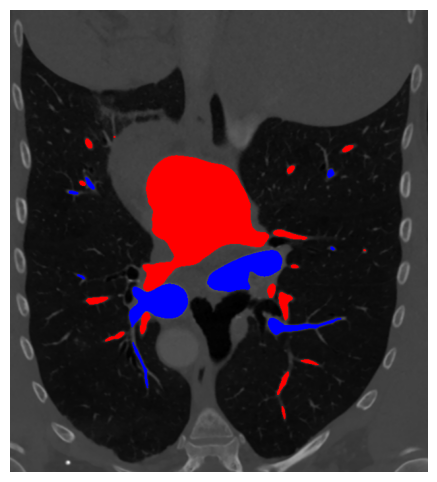

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd

# Load the CT image and label map
path_to_nrrd = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markups/88-Nate/Vx3-2.nrrd'  # Adjust this to the path of your NRRD file
path_to_segmentation = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markups/88-Nate/S-Final-1-label(Vx3-2try).nrrd'  # Adjust this to the path of your NRRD file
ct_data, ct_header = nrrd.read(path_to_nrrd)
label_data, label_header = nrrd.read(path_to_segmentation)

# Select the slice index (assuming the middle slice for demonstration)
slice_index = ct_data.shape[1] // 2
ct_slice = ct_data[:, slice_index, :]
label_slice = label_data[:, slice_index, :]

# Normalize the CT slice to 0-255 for display
ct_slice_normalized = (ct_slice - ct_slice.min()) / (ct_slice.max() - ct_slice.min()) * 255
ct_slice_normalized = ct_slice_normalized.astype(np.uint8)

ct_slice_normalized = np.rot90(ct_slice_normalized, k=-1)

# Rotate the label slice to match the CT slice orientation
label_slice_rotated = np.rot90(label_slice, k=-1)

# Create an RGB image from the CT slice for overlay (greyscale to RGB)
ct_rgb = np.stack([ct_slice_normalized, ct_slice_normalized, ct_slice_normalized], axis=-1)

# Apply color to the rotated label map: 1 for arterial (blue), 2 for venous (red)
ct_rgb[label_slice_rotated == 1] = [0, 0, 255]  # Arterial tree in blue
ct_rgb[label_slice_rotated == 2] = [255, 0, 0]  # Venous tree in red

# Display and save the combined image
plt.figure(figsize=(6, 6))
plt.imshow(ct_rgb)
plt.axis('off')  # Hide the axis
# plt.savefig('ct_with_labels.png', bbox_inches='tight', pad_inches=0)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from scipy.ndimage import center_of_mass, binary_fill_holes


def get_segment_label_values(header):
    segment_labels = {}
    for key, value in header.items():
        if 'Segment0_LabelValue' in key:
            segment_labels['Segment0'] = int(value)
        elif 'Segment1_LabelValue' in key:
            segment_labels['Segment1'] = int(value)
    print("Segment label values extracted:", segment_labels)
    return segment_labels

def process_and_overlay_coronal_slice(ct_path, label_path, output_file):
    try:
        ct_data, ct_header = nrrd.read(ct_path)
        label_data, label_header = nrrd.read(label_path)

        print("CT data shape:", ct_data.shape)
        print("Label data shape:", label_data.shape)

        if ct_data.shape != label_data.shape:
            print("Warning: CT image and label file dimensions do not match exactly. Attempting to proceed...")

        segment_label_values = get_segment_label_values(label_header)
        
        adjusted_label_data = np.copy(label_data)
        max_label_value = np.max(label_data)
        print("Max label value before adjustment:", max_label_value)

        unique_labels = np.unique(label_data)
        print("Unique label values before adjustment:", unique_labels)

        for label in unique_labels:
            if label == segment_label_values['Segment0']:
                adjusted_label_data[label_data == label] = 1
            elif label == segment_label_values['Segment1']:
                adjusted_label_data[label_data == label] = 2
            elif label in [1, 2]:
                adjusted_label_data[label_data == label] = max_label_value + 1
                max_label_value += 1

        print("Max label value after adjustment:", max_label_value)
        unique_labels_after = np.unique(adjusted_label_data)
        print("Unique label values after adjustment:", unique_labels_after)

        slice_index = ct_data.shape[1] // 2
        ct_slice = ct_data[:, slice_index, :]
        label_slice = adjusted_label_data[:, slice_index, :]
        
        ct_slice_normalized = (ct_slice - ct_slice.min()) / (ct_slice.max() - ct_slice.min()) * 255
        ct_slice_normalized = ct_slice_normalized.astype(np.uint8)

        ct_slice_normalized = np.rot90(ct_slice_normalized, k=-1)
        ct_slice_normalized = np.flipud(ct_slice_normalized)
        ct_slice_normalized = np.fliplr(ct_slice_normalized)

        label_slice_rotated = np.rot90(label_slice, k=-1)
        label_slice_rotated = np.flipud(label_slice_rotated)
        label_slice_rotated = np.fliplr(label_slice_rotated)

        ct_rgb = np.stack([ct_slice_normalized, ct_slice_normalized, ct_slice_normalized], axis=-1)

        ct_rgb[label_slice_rotated == 1] = [0, 151, 205]
        ct_rgb[label_slice_rotated == 2] = [216, 101, 79]

        plt.figure(figsize=(6, 6))
        plt.imshow(ct_rgb)
        plt.axis('off')

        for label_val in [1, 2]:
            mask = label_slice_rotated == label_val
            mask_filled = binary_fill_holes(mask)
            contours = plt.contour(mask_filled, colors='white', levels=[0.5], linewidths=.8)
            com = center_of_mass(mask)
            plt.text(com[1], com[0], str(label_val), color='white', ha='center', va='center')

        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"An error occurred: {e}")

ct_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/Vx3.nrrd'
label_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Final-1.nrrd'
output_file = 'ct_with_labels_overlay.png'

process_and_overlay_coronal_slice(ct_path, label_path, output_file)


CT data shape: (625, 451, 632)
Label data shape: (625, 451, 632)
Segment label values extracted: {'Segment0': 1, 'Segment1': 4}
Max label value before adjustment: 4
Unique label values before adjustment: [0 1 3 4]
Max label value after adjustment: 4
Unique label values after adjustment: [0 1 2 3]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from scipy.ndimage import center_of_mass, binary_fill_holes

def get_segment_label_values(header):
    """
    Extracts label values for Segment0 and Segment1 from the NRRD header.

    Args:
    - header (dict): The header information from an NRRD file.

    Returns:
    - dict: A dictionary with the original label values for Segment0 and Segment1.
    """
    segment_labels = {}
    for key, value in header.items():
        if 'Segment0_LabelValue' in key:
            segment_labels['Segment0'] = int(value)
        elif 'Segment1_LabelValue' in key:
            segment_labels['Segment1'] = int(value)
    return segment_labels

def process_and_overlay_coronal_slice(ct_path, label_path, output_file):
  

    try:
        # Load the CT image and label map
        ct_data, ct_header = nrrd.read(ct_path)
        label_data, label_header = nrrd.read(label_path)

        # Check dimensions for compatibility
        if ct_data.shape != label_data.shape:
            print("Warning: CT image and label file dimensions do not match exactly. Attempting to proceed...")

        # Extract label values for Segment0 and Segment1 from label_header
        # Assuming we have a function get_segment_label_values(header) -> returns a dict with {'Segment0': 1, 'Segment1': 2}
        segment_label_values = get_segment_label_values(label_header)

        adjusted_label_data = np.copy(label_data)
        max_label_value = np.max(label_data) + 1

        # Adjust all other labels that are 1 or 2 but not Segment0 or Segment1
        for label in np.unique(label_data):
            if label == segment_label_values['Segment0']:
                adjusted_label_data[label_data == label] = 1
            elif label == segment_label_values['Segment1']:
                adjusted_label_data[label_data == label] = 2
            elif label in [1, 2]:
                adjusted_label_data[label_data == label] = max_label_value
                max_label_value += 1

        # Continue with adjusted label data for visualization
        slice_index = ct_data.shape[1] // 2
        ct_slice = ct_data[:, slice_index, :]
        label_slice = adjusted_label_data[:, slice_index, :]
        # The rest remains unchanged, but use label_slice for processing...
        ct_slice = ct_data[:, slice_index, :]
        label_slice = label_data[:, slice_index, :]

        # Normalize the CT slice to 0-255 for display
        ct_slice_normalized = (ct_slice - ct_slice.min()) / (ct_slice.max() - ct_slice.min()) * 255
        ct_slice_normalized = ct_slice_normalized.astype(np.uint8)

        # Rotate the slice 90 degrees counterclockwise, flip vertically, and horizontally
        ct_slice_normalized = np.rot90(ct_slice_normalized, k=-1)
        ct_slice_normalized = np.flipud(ct_slice_normalized)
        ct_slice_normalized = np.fliplr(ct_slice_normalized)

        # Rotate, flip, and mirror the label slice to match the CT slice orientation
        label_slice_rotated = np.rot90(label_slice, k=-1)
        label_slice_rotated = np.flipud(label_slice_rotated)
        label_slice_rotated = np.fliplr(label_slice_rotated)

        # Create an RGB image from the CT slice for overlay (greyscale to RGB)
        ct_rgb = np.stack([ct_slice_normalized, ct_slice_normalized, ct_slice_normalized], axis=-1)

        # Apply color to the rotated, flipped, and mirrored label map
        ct_rgb[label_slice_rotated == 1] = [0, 151, 205]  # Arterial tree in blue
        ct_rgb[label_slice_rotated == 2] = [216, 101, 79]  # Venous tree in red

        # Initialize the figure
        plt.figure(figsize=(6, 6))
        plt.imshow(ct_rgb)
        plt.axis('off')  # Hide the axis

        for label_val in [1, 2]:  # For A and V segments
            mask = label_slice_rotated == label_val
            mask_filled = binary_fill_holes(mask)  # Fill holes to ensure continuous contours
            contours = plt.contour(mask_filled, colors='white' if label_val == 1 else 'white', levels=[0.5], linewidths=.8)
        # Find the center of mass for each label and annotate
        for label in [1, 2]:  # Iterate over label values
            mask = label_slice_rotated == label
            if np.any(mask):
                com = center_of_mass(mask)
                plt.text(com[1], com[0], str(label), color='white', ha='center', va='center')

        # Save the combined image
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()  # Close the figure to free memory
    except ValueError as e:
        print(f"An error occurred: {e}")


ct_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/Vx3.nrrd'
label_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Final-1.nrrd'
output_file = 'ct_with_labels_overlay.png'

process_and_overlay_coronal_slice(ct_path, label_path, output_file)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from scipy.ndimage import center_of_mass, binary_fill_holes

def get_segment_label_values(header):
    """
    Extracts label values for Segment0 and Segment1 from the NRRD header.

    Args:
    - header (dict): The header information from an NRRD file.

    Returns:
    - dict: A dictionary with the original label values for Segment0 and Segment1.
    """
    segment_labels = {}
    for key, value in header.items():
        if 'Segment0_LabelValue' in key:
            segment_labels['Segment0'] = int(value)
        elif 'Segment1_LabelValue' in key:
            segment_labels['Segment1'] = int(value)
    return segment_labels

def process_and_overlay_coronal_slice(ct_path, label_path, output_file):
  

    try:
        # Load the CT image and label map
        ct_data, ct_header = nrrd.read(ct_path)
        label_data, label_header = nrrd.read(label_path)

        # Check dimensions for compatibility
        if ct_data.shape != label_data.shape:
            print("Warning: CT image and label file dimensions do not match exactly. Attempting to proceed...")

        # Extract label values for Segment0 and Segment1 from label_header
        # Assuming we have a function get_segment_label_values(header) -> returns a dict with {'Segment0': 1, 'Segment1': 2}
        segment_label_values = get_segment_label_values(label_header)

        adjusted_label_data = np.copy(label_data)
        max_label_value = np.max(label_data) + 1

        # Adjust all other labels that are 1 or 2 but not Segment0 or Segment1
        for label in np.unique(label_data):
            if label == segment_label_values['Segment0']:
                adjusted_label_data[label_data == label] = 1
            elif label == segment_label_values['Segment1']:
                adjusted_label_data[label_data == label] = 2
            elif label in [1, 2]:
                adjusted_label_data[label_data == label] = max_label_value
                max_label_value += 1

        # Continue with adjusted label data for visualization
        slice_index = ct_data.shape[1] // 2
        ct_slice = ct_data[:, slice_index, :]
        label_slice = adjusted_label_data[:, slice_index, :]
        # The rest remains unchanged, but use label_slice for processing...
        ct_slice = ct_data[:, slice_index, :]
        label_slice = label_data[:, slice_index, :]

        # Normalize the CT slice to 0-255 for display
        ct_slice_normalized = (ct_slice - ct_slice.min()) / (ct_slice.max() - ct_slice.min()) * 255
        ct_slice_normalized = ct_slice_normalized.astype(np.uint8)

        # Rotate the slice 90 degrees counterclockwise, flip vertically, and horizontally
        ct_slice_normalized = np.rot90(ct_slice_normalized, k=-1)
        ct_slice_normalized = np.flipud(ct_slice_normalized)
        ct_slice_normalized = np.fliplr(ct_slice_normalized)

        # Rotate, flip, and mirror the label slice to match the CT slice orientation
        label_slice_rotated = np.rot90(label_slice, k=-1)
        label_slice_rotated = np.flipud(label_slice_rotated)
        label_slice_rotated = np.fliplr(label_slice_rotated)

        # Create an RGB image from the CT slice for overlay (greyscale to RGB)
        ct_rgb = np.stack([ct_slice_normalized, ct_slice_normalized, ct_slice_normalized], axis=-1)

        # Apply color to the rotated, flipped, and mirrored label map
        ct_rgb[label_slice_rotated == 1] = [0, 151, 205]  # Arterial tree in blue
        ct_rgb[label_slice_rotated == 2] = [216, 101, 79]  # Venous tree in red

        # Initialize the figure
        plt.figure(figsize=(6, 6))
        plt.imshow(ct_rgb)
        plt.axis('off')  # Hide the axis

        for label_val in [1, 2]:  # For A and V segments
            mask = label_slice_rotated == label_val
            mask_filled = binary_fill_holes(mask)  # Fill holes to ensure continuous contours
            contours = plt.contour(mask_filled, colors='white' if label_val == 1 else 'white', levels=[0.5], linewidths=.8)
        # Find the center of mass for each label and annotate
        for label in [1, 2]:  # Iterate over label values
            mask = label_slice_rotated == label
            if np.any(mask):
                com = center_of_mass(mask)
                plt.text(com[1], com[0], str(label), color='white', ha='center', va='center')

        # Save the combined image
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()  # Close the figure to free memory
    except ValueError as e:
        print(f"An error occurred: {e}")


ct_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/Vx3.nrrd'
label_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Final-1.nrrd'
output_file = 'ct_with_labels_overlay.png'

process_and_overlay_coronal_slice(ct_path, label_path, output_file)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from scipy.ndimage import center_of_mass, binary_fill_holes
def process_and_overlay_coronal_slice(ct_path, label_path, output_file):
    
    try:
        # Load the CT image and label map
        ct_data, ct_header = nrrd.read(ct_path)
        label_data, label_header = nrrd.read(label_path)

        if ct_data.shape != label_data.shape:
            print("Warning: CT image and label file dimensions do not match exactly. Attempting to proceed...")

        # Automatically select the middle slice index for a coronal slice
        slice_index = ct_data.shape[1] // 2

        # Process the selected slice
        ct_slice = ct_data[:, slice_index, :]
        label_slice = label_data[:, slice_index, :]

        # Normalize the CT slice to 0-255 for display
        ct_slice_normalized = (ct_slice - ct_slice.min()) / (ct_slice.max() - ct_slice.min()) * 255
        ct_slice_normalized = ct_slice_normalized.astype(np.uint8)

        # Rotate the slice 90 degrees counterclockwise, flip vertically, and horizontally
        ct_slice_normalized = np.rot90(ct_slice_normalized, k=-1)
        ct_slice_normalized = np.flipud(ct_slice_normalized)
        ct_slice_normalized = np.fliplr(ct_slice_normalized)

        # Rotate, flip, and mirror the label slice to match the CT slice orientation
        label_slice_rotated = np.rot90(label_slice, k=-1)
        label_slice_rotated = np.flipud(label_slice_rotated)
        label_slice_rotated = np.fliplr(label_slice_rotated)

        # Create an RGB image from the CT slice for overlay (greyscale to RGB)
        ct_rgb = np.stack([ct_slice_normalized, ct_slice_normalized, ct_slice_normalized], axis=-1)

        # Apply color to the rotated, flipped, and mirrored label map
        ct_rgb[label_slice_rotated == 1] = [0, 151, 205]  # Arterial tree in blue
        ct_rgb[label_slice_rotated == 2] = [216, 101, 79]  # Venous tree in red

        # Initialize the figure
        plt.figure(figsize=(6, 6))
        plt.imshow(ct_rgb)
        plt.axis('off')  # Hide the axis

        for label_val in [1, 2]:  # For A and V segments
            mask = label_slice_rotated == label_val
            mask_filled = binary_fill_holes(mask)  # Fill holes to ensure continuous contours
            contours = plt.contour(mask_filled, colors='white' if label_val == 1 else 'white', levels=[0.5], linewidths=.8)
        # Find the center of mass for each label and annotate
        for label in [1, 2]:  # Iterate over label values
            mask = label_slice_rotated == label
            if np.any(mask):
                com = center_of_mass(mask)
                plt.text(com[1], com[0], str(label), color='white', ha='center', va='center')

        # Save the combined image
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()  # Close the figure to free memory
    except ValueError as e:
        print(f"An error occurred: {e}")


ct_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/Vx3.nrrd'
label_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Final-1.nrrd'
output_file = 'ct_with_labels_overlay.png'

process_and_overlay_coronal_slice(ct_path, label_path, output_file)


In [4]:
label_path = 'Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-01-MESAL-5010098-E3/Markups/88-Nate/S-Final-1.nrrd'
label_data, label_header = nrrd.read(label_path)
print(label_header)

OrderedDict([('type', 'unsigned char'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([625, 451, 632])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('encoding', 'gzip'), ('space origin', array([-116.8, -226.2, -734.7])), ('Segment0_Color', '0 0.592157 0.807843'), ('Segment0_ColorAutoGenerated', '1'), ('Segment0_Extent', '0 624 0 450 0 631'), ('Segment0_ID', 'Segment_1'), ('Segment0_LabelValue', '1'), ('Segment0_Layer', '0'), ('Segment0_Name', 'Aseed'), ('Segment0_NameAutoGenerated', '0'), ('Segment0_Tags', 'Segmentation.Status:inprogress|TerminologyEntry:Segmentation category and type - 3D Slicer General Anatomy list~SCT^85756007^Tissue~SCT^29092000^Vein~^^~Anatomic codes - DICOM master list~^^~^^|'), ('Segment1_Color', '0.847059 0.396078 0.309804'), ('Segment1_ColorAutoGenerated', '1'), ('Segment1_Extent', '0 624 0 450 0 631'), ('Segment1_ID', 'Segment_2')

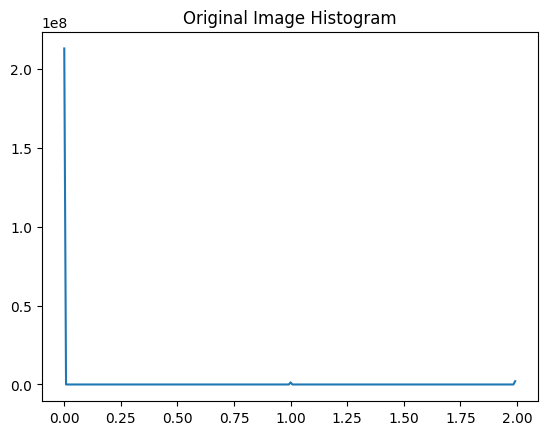

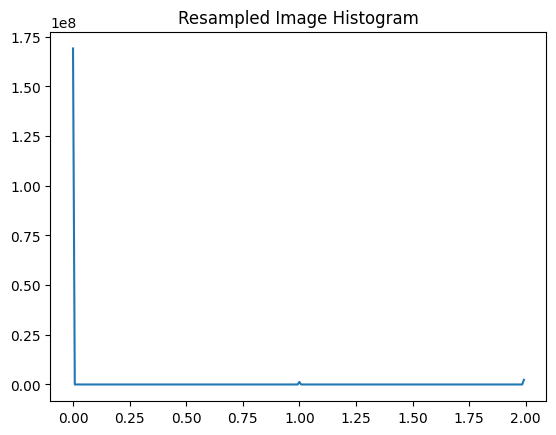

In [8]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate and plot histogram
def plot_histogram(image, title):
    # Convert ITK image to a NumPy array
    array = itk.array_from_image(image)
    
    # Flatten the array to 1D for histogram computation
    flattened_array = array.flatten()
    
    # Calculate histogram
    histogram, bin_edges = np.histogram(flattened_array, bins=256)
    
    # Plot histogram
    plt.figure()
    plt.title(title)
    plt.plot(bin_edges[0:-1], histogram)  # bin_edges is one element longer than histogram
    plt.show()

# Read the images
image1 = itk.imread(output_filename, itk.SS)
image2 = itk.imread(image2_filename, itk.SS)

# Calculate and plot histograms
plot_histogram(image1, 'Original Image Histogram')
plot_histogram(image2, 'Resampled Image Histogram')


In [9]:
print(f"Original Image Pixel Type: {itk.template(image1)[1][0]}")
print(f"Resampled Image Pixel Type: {itk.template(image2)[1][0]}")

Original Image Pixel Type: <itkCType signed short>
Resampled Image Pixel Type: <itkCType signed short>


In [11]:
import nrrd

image1, header = nrrd.read('Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/S-Final-1-label.nrrd')
image2, header1 = nrrd.read('Z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3/Markup/88-Nate/S-Final-1-label(Vx3-2).nrrd')

print(header)
print(header1)

OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([603, 446, 642])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-115.8, -211.7, -511.9]))])
OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([634, 487, 701])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-124.1, -217. , -528.6]))])


In [ ]:
import itk

def resample_image(image1_filename, image2_filename, output_filename):
    # Explicitly specify the NrrdImageIO to ensure ITK can read the NRRD files
    nrrd_io = itk.NrrdImageIO.New()
    
    # Read the input images
    PixelType = itk.F  # Set the pixel type as floating point
    Dimension = 3  # Set the dimension of the images (3D in this case)
    ImageType = itk.Image[PixelType, Dimension]
    
    # Set the NrrdImageIO for both read operations
    image1 = itk.imread(image1_filename, PixelType, imageio=nrrd_io)
    image2 = itk.imread(image2_filename, PixelType, imageio=nrrd_io)

    # Extract the parameters from Image 1
    desired_spacing = image1.GetSpacing()
    desired_origin = image1.GetOrigin()
    desired_direction = image1.GetDirection()
    desired_size = image1.GetLargestPossibleRegion().GetSize()

    # Setup the resample filter
    resample_filter = itk.ResampleImageFilter[ImageType, ImageType].New()
    resample_filter.SetInput(image2)
    resample_filter.SetSize(desired_size)
    resample_filter.SetOutputSpacing(desired_spacing)
    resample_filter.SetOutputOrigin(desired_origin)
    resample_filter.SetOutputDirection(desired_direction)
    
    # Use a linear interpolator
    interpolator = itk.LinearInterpolateImageFunction[ImageType, itk.D].New()
    resample_filter.SetInterpolator(interpolator)
    
    # Set the default pixel value for out-of-bound regions
    resample_filter.SetDefaultPixelValue(0)

    # Execute the resampling
    resample_filter.Update()

    # Save the resampled image
    itk.imwrite(resample_filter.GetOutput(), output_filename, imageio=nrrd_io)

# Example usage
image1_filename = 'z:/D-Images/Mesal-3/2-Checked-Done-Temp/Done/Case-90-5018196/Markup/88-Nate/Vx3-2.nrrd'
image2_filename = 'z:/D-Images/Mesal-3/2-Checked-Done-Temp/Done/Case-90-5018196/Markup/88-Nate/S-Final-1-label.nrrd'
output_filename = 'z:/D-Images/Mesal-3/2-Checked-Done-Temp/Done/Case-90-5018196/Markup/88-Nate/S-Final-1-label(Vx3-2).nrrd'
resample_image(image1_filename, image2_filename, output_filename)
